In [1]:
! pip install autoviz

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import tree, ensemble
from sklearn.model_selection import StratifiedShuffleSplit
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.datasets import load_iris
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.gaussian_process import GaussianProcessRegressor
from sklearn.gaussian_process.kernels import RBF, ConstantKernel as C
from sklearn.naive_bayes import GaussianNB
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import cross_val_score, GridSearchCV
from sklearn.linear_model import LogisticRegression, LinearRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from IPython.display import clear_output

In [5]:
orig_inputs = np.load ("./initial_inputs.npy")
orig_outputs = np.load ("./initial_outputs.npy")
sec_inputs = np.load ("../../initial_data2/function_4/initial_inputs.npy")
sec_outputs = np.load ("../../initial_data2/function_4/initial_outputs.npy")

In [7]:
orig_inputs, sec_inputs

(array([[0.89698105, 0.72562797, 0.17540431, 0.70169437],
        [0.8893564 , 0.49958786, 0.53926886, 0.50878344],
        [0.25094624, 0.03369313, 0.14538002, 0.49493242],
        [0.34696206, 0.0062504 , 0.76056361, 0.61302356],
        [0.12487118, 0.12977019, 0.38440048, 0.2870761 ],
        [0.80130271, 0.50023109, 0.70664456, 0.19510284],
        [0.24770826, 0.06044543, 0.04218635, 0.44132425],
        [0.74670224, 0.7570915 , 0.36935306, 0.20656628],
        [0.40066503, 0.07257425, 0.88676825, 0.24384229],
        [0.6260706 , 0.58675126, 0.43880578, 0.77885769],
        [0.95713529, 0.59764438, 0.76611385, 0.77620991],
        [0.73281243, 0.14524998, 0.47681272, 0.13336573],
        [0.65511548, 0.07239183, 0.68715175, 0.08151656],
        [0.21973443, 0.83203134, 0.48286416, 0.08256923],
        [0.48859419, 0.2119651 , 0.93917791, 0.37619173],
        [0.16713049, 0.87655456, 0.21723954, 0.95980098],
        [0.21691119, 0.16608583, 0.24137226, 0.77006248],
        [0.387

In [9]:
# Add the new data points
new_data = np.array([[0.144745, 0.741586, 0.358425, 0.629221],
                     [0.16688 , 0.523665, 0.140174, 0.132658],
                     [0.171219, 0.750186, 0.620869, 0.108325],
                     [0.161001, 0.761373, 0.396068, 0.762361],
                     [0.138766, 0.786401, 0.411016, 0.829629],
                     [0.569585, 0.656556, 0.505077, 0.318535],
                     [0.186248, 0.394748, 0.523034, 0.334573],
                     [0.276679, 0.681449, 0.493981, 0.564555]])
inputs = np.vstack([orig_inputs, sec_inputs, new_data])

len(orig_inputs), len(inputs)

(30, 68)

In [11]:
inputs

array([[0.89698105, 0.72562797, 0.17540431, 0.70169437],
       [0.8893564 , 0.49958786, 0.53926886, 0.50878344],
       [0.25094624, 0.03369313, 0.14538002, 0.49493242],
       [0.34696206, 0.0062504 , 0.76056361, 0.61302356],
       [0.12487118, 0.12977019, 0.38440048, 0.2870761 ],
       [0.80130271, 0.50023109, 0.70664456, 0.19510284],
       [0.24770826, 0.06044543, 0.04218635, 0.44132425],
       [0.74670224, 0.7570915 , 0.36935306, 0.20656628],
       [0.40066503, 0.07257425, 0.88676825, 0.24384229],
       [0.6260706 , 0.58675126, 0.43880578, 0.77885769],
       [0.95713529, 0.59764438, 0.76611385, 0.77620991],
       [0.73281243, 0.14524998, 0.47681272, 0.13336573],
       [0.65511548, 0.07239183, 0.68715175, 0.08151656],
       [0.21973443, 0.83203134, 0.48286416, 0.08256923],
       [0.48859419, 0.2119651 , 0.93917791, 0.37619173],
       [0.16713049, 0.87655456, 0.21723954, 0.95980098],
       [0.21691119, 0.16608583, 0.24137226, 0.77006248],
       [0.38748784, 0.80453226,

In [13]:
orig_outputs

array([-22.10828779, -14.60139663, -11.69993246, -16.05376511,
       -10.06963343, -15.48708254, -12.68168498, -16.02639977,
       -17.04923465, -12.74176599, -27.31639636, -13.52764887,
       -16.6791152 , -16.50715856, -17.81799934, -26.56182083,
       -12.75832422, -19.44155762, -28.90327367, -13.70274694,
       -29.4270914 , -11.56574199, -26.85778644,  -7.96677535,
        -6.70208925, -32.62566022, -19.98949793,  -4.02554228,
       -13.12278233, -23.1394284 ])

In [15]:
outputs = np.append(orig_outputs, sec_outputs)
outputs = np.append(outputs, -12.675428378365925)
outputs = np.append(outputs, -10.559164608560653)
outputs = np.append(outputs, -15.359576627384097)
outputs = np.append(outputs, -16.430881546415254)
outputs = np.append(outputs, -19.114028470289217)
outputs = np.append(outputs, -8.373517388105597)
outputs = np.append(outputs, -4.4360157978298)
outputs = np.append(outputs, -9.042881785370067)
len(outputs)

68

In [17]:
orig_data = {'feature1': orig_inputs[:,0],
             'feature2': orig_inputs[:,1],
             'feature3': orig_inputs[:,2],
             'feature4': orig_inputs[:,3],
             'target': orig_outputs
       }

orig_df = pd.DataFrame(orig_data)
orig_df

,feature1,feature2,feature3,feature4,target
0,0.896981,0.725628,0.175404,0.701694,-22.108288
1,0.889356,0.499588,0.539269,0.508783,-14.601397
2,0.250946,0.033693,0.145380,0.494932,-11.699932
3,0.346962,0.006250,0.760564,0.613024,-16.053765
4,0.124871,0.129770,0.384400,0.287076,-10.069633
5,0.801303,0.500231,0.706645,0.195103,-15.487083
6,0.247708,0.060445,0.042186,0.441324,-12.681685
7,0.746702,0.757092,0.369353,0.206566,-16.026400
8,0.400665,0.072574,0.886768,0.243842,-17.049235
9,0.626071,0.586751,0.438806,0.778858,-12.741766


In [19]:
data = {'feature1': inputs[:,0],
        'feature2': inputs[:,1],
        'feature3': inputs[:,2],
        'feature4': inputs[:,3],
        'target': outputs
       }

df = pd.DataFrame(data)
df

,feature1,feature2,feature3,feature4,target
0,0.896981,0.725628,0.175404,0.701694,-22.108288
1,0.889356,0.499588,0.539269,0.508783,-14.601397
2,0.250946,0.033693,0.145380,0.494932,-11.699932
3,0.346962,0.006250,0.760564,0.613024,-16.053765
4,0.124871,0.129770,0.384400,0.287076,-10.069633
...,...,...,...,...,...
63,0.161001,0.761373,0.396068,0.762361,-16.430882
64,0.138766,0.786401,0.411016,0.829629,-19.114028
65,0.569585,0.656556,0.505077,0.318535,-8.373517
66,0.186248,0.394748,0.523034,0.334573,-4.436016


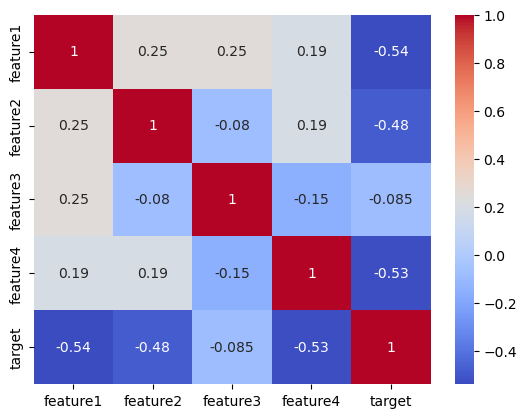

In [21]:
# Display correlation to Output Outcome
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.animation as animation
from matplotlib.animation import FuncAnimation
from IPython.display import HTML
import seaborn as sns
numerical_df = orig_df.select_dtypes(include=[np.number])
correlation_matrix = numerical_df.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.show()

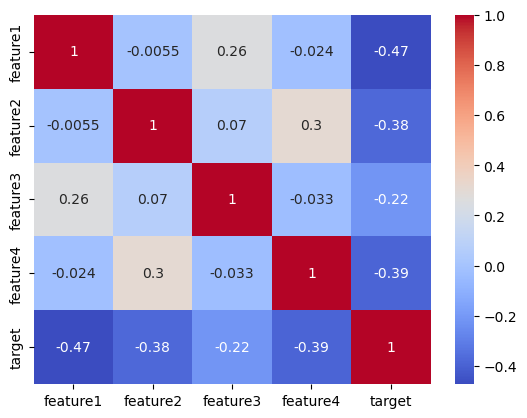

In [23]:
# Display correlation to Output Outcome
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.animation as animation
from matplotlib.animation import FuncAnimation
from IPython.display import HTML
import seaborn as sns
numerical_df = df.select_dtypes(include=[np.number])
correlation_matrix = numerical_df.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.show()

In [25]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 68 entries, 0 to 67
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   feature1  68 non-null     float64
 1   feature2  68 non-null     float64
 2   feature3  68 non-null     float64
 3   feature4  68 non-null     float64
 4   target    68 non-null     float64
dtypes: float64(5)
memory usage: 2.8 KB


In [27]:
orig_df.describe()

,feature1,feature2,feature3,feature4,target
count,30.000000,30.000000,30.000000,30.000000,30.000000
mean,0.542872,0.477129,0.465693,0.474096,-17.238587
std,0.294007,0.308910,0.261618,0.292412,7.137959
min,0.037825,0.006250,0.042186,0.081517,-32.625660
25%,0.258744,0.150459,0.223273,0.215885,-21.578590
50%,0.601918,0.499909,0.445999,0.499451,-16.040082
75%,0.787653,0.749126,0.708686,0.758504,-12.745906
max,0.985622,0.919592,0.939178,0.999483,-4.025542


In [29]:
df.describe()

,feature1,feature2,feature3,feature4,target
count,68.000000,68.000000,68.000000,68.000000,68.000000
mean,0.488755,0.507319,0.450237,0.483526,-16.658972
std,0.295769,0.301695,0.264997,0.270241,6.857716
min,0.027731,0.005533,0.005458,0.023755,-32.625660
25%,0.219029,0.200495,0.215252,0.252695,-20.099810
50%,0.445951,0.573293,0.448552,0.507326,-16.127029
75%,0.740635,0.763433,0.687495,0.705439,-12.680121
max,0.985795,0.933116,0.972202,0.999483,-4.025542


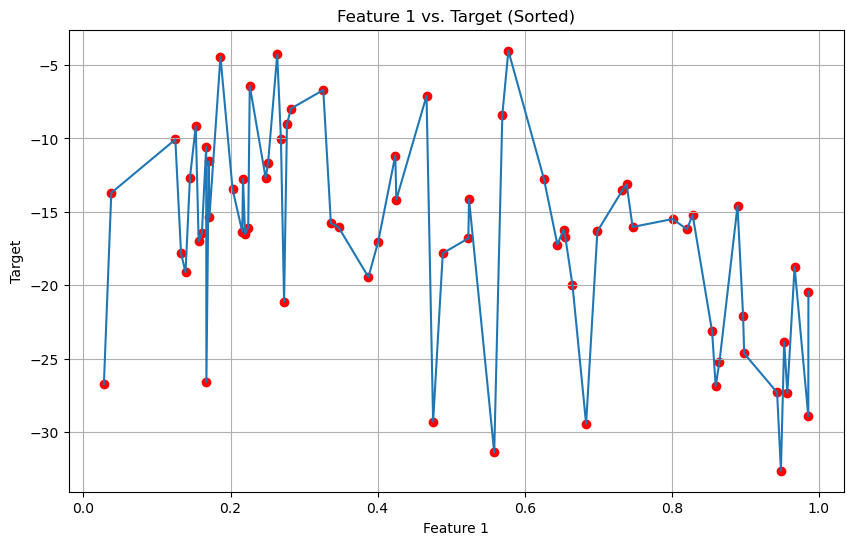

In [31]:
import matplotlib.pyplot as plt

# Sort the DataFrame by 'feature1'
df_sorted = df.sort_values('feature1')

# Plot 'feature1' against 'target' with connected points
plt.figure(figsize=(10, 6))
plt.plot(df_sorted['feature1'], df_sorted['target'], linestyle='-')
plt.scatter(df_sorted['feature1'], df_sorted['target'], color='red', label='Samples')
plt.xlabel('Feature 1')
plt.ylabel('Target')
plt.title('Feature 1 vs. Target (Sorted)')
plt.grid(True)
plt.show()

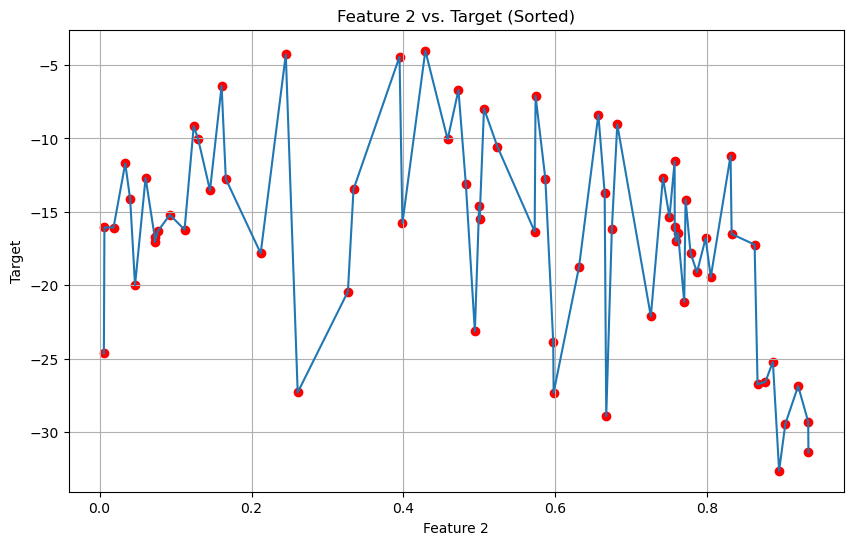

In [33]:
# Sort the DataFrame by 'feature2'
df_sorted = df.sort_values('feature2')

# Plot 'feature2' against 'target' with connected points
plt.figure(figsize=(10, 6))
plt.plot(df_sorted['feature2'], df_sorted['target'], linestyle='-')
plt.scatter(df_sorted['feature2'], df_sorted['target'], color='red', label='Samples')
plt.xlabel('Feature 2')
plt.ylabel('Target')
plt.title('Feature 2 vs. Target (Sorted)')
plt.grid(True)
plt.show()

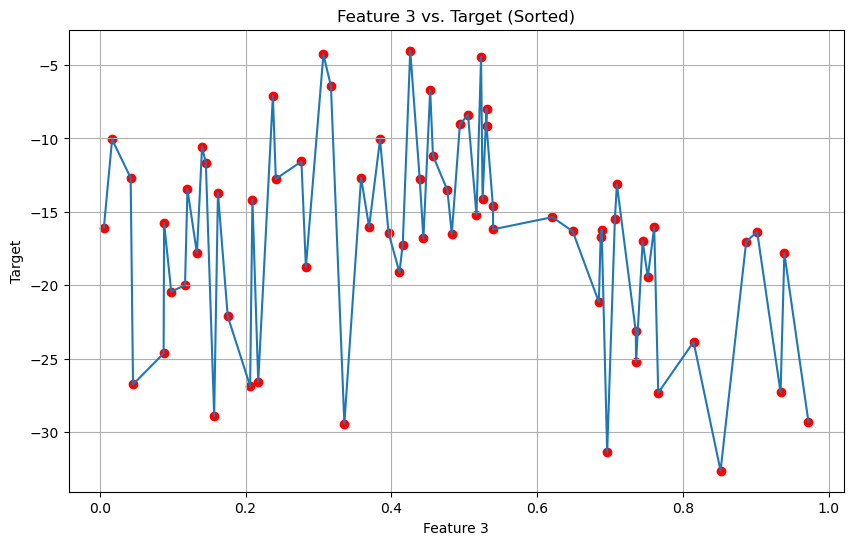

In [35]:
# Sort the DataFrame by 'feature3'
df_sorted = df.sort_values('feature3')

# Plot 'feature2' against 'target' with connected points
plt.figure(figsize=(10, 6))
plt.plot(df_sorted['feature3'], df_sorted['target'], linestyle='-')
plt.scatter(df_sorted['feature3'], df_sorted['target'], color='red', label='Samples')
plt.xlabel('Feature 3')
plt.ylabel('Target')
plt.title('Feature 3 vs. Target (Sorted)')
plt.grid(True)
plt.show()

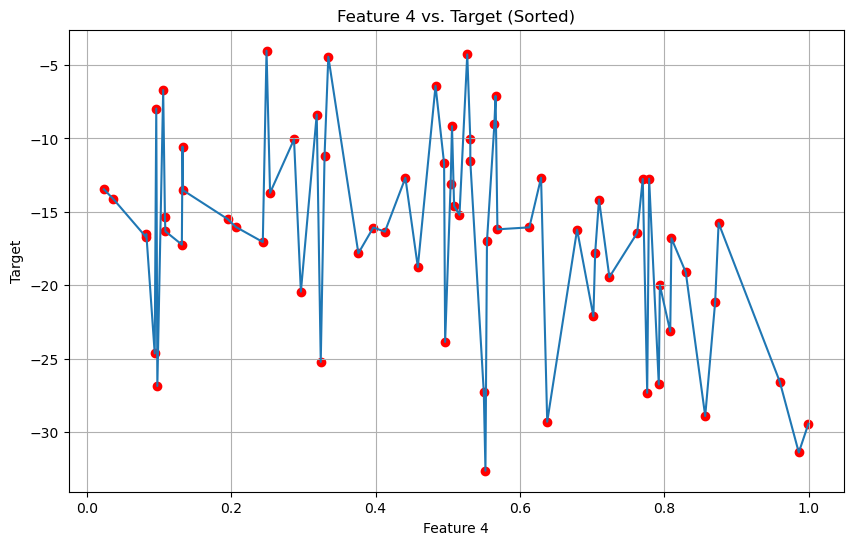

In [37]:
# Sort the DataFrame by 'feature4'
df_sorted = df.sort_values('feature4')

# Plot 'feature2' against 'target' with connected points
plt.figure(figsize=(10, 6))
plt.plot(df_sorted['feature4'], df_sorted['target'], linestyle='-')
plt.scatter(df_sorted['feature4'], df_sorted['target'], color='red', label='Samples')
plt.xlabel('Feature 4')
plt.ylabel('Target')
plt.title('Feature 4 vs. Target (Sorted)')
plt.grid(True)
plt.show()

In [39]:
print('Running......')

# Define the parameter grid for the Gaussian Process Regressor
#param_grid = {
#    'kernel': [RBF(length_scale=1.0), RBF(length_scale=0.1), RBF(length_scale=0.5), RBF(length_scale=10.0)],
#    'alpha': [1e-10, 1e-5, 1e-2],
#    'n_restarts_optimizer': [5, 9, 10]
#}

param_grid = {
    'kernel': [C(1.0, (1e-3, 1e3)) * RBF(0.1, (1e-2, 1e2)),
               C(1.0, (1e-3, 1e3)) * RBF(0.5, (1e-2, 1e2)),
               C(1.0, (1e-3, 1e3)) * RBF(1.0, (1e-2, 1e2)),
               C(1.0, (1e-3, 1e3)) * RBF(10, (1e-2, 1e2)),
               C(10.0, (1e-3, 1e3)) * RBF(0.1, (1e-2, 1e2)),
               C(10.0, (1e-3, 1e3)) * RBF(0.5, (1e-2, 1e2)),
               C(10.0, (1e-3, 1e3)) * RBF(1.0, (1e-2, 1e2)),
               C(10.0, (1e-3, 1e3)) * RBF(10, (1e-2, 1e2))],
    'alpha': [1e-10, 1e-5, 1e-2],
    'n_restarts_optimizer': [5, 9, 10, 15, 20, 50],
    'normalize_y': [True],
}


# Create the Gaussian Process Regressor
gpr = GaussianProcessRegressor()

# Create the GridSearchCV object
grid_search = GridSearchCV(gpr, param_grid, cv=5, scoring='neg_mean_squared_error')

# # Prepare the data
X = df[['feature1', 'feature2', 'feature3', 'feature4']]
y = df['target']
grid_search.fit(X, y)


# Print the best parameters and best score
print("Best parameters:", grid_search.best_params_)
print("Best score:", grid_search.best_score_)

# Get the best estimator
best_gpr = grid_search.best_estimator_

# Use the best estimator to predict the target variable
y_pred = best_gpr.predict(X)

best_gpr

Running......


/opt/anaconda3/lib/python3.12/site-packages/sklearn/gaussian_process/_gpr.py:663: ConvergenceWarning: lbfgs failed to converge (status=2):
ABNORMAL_TERMINATION_IN_LNSRCH.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  _check_optimize_result("lbfgs", opt_res)
/opt/anaconda3/lib/python3.12/site-packages/sklearn/gaussian_process/_gpr.py:663: ConvergenceWarning: lbfgs failed to converge (status=2):
ABNORMAL_TERMINATION_IN_LNSRCH.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  _check_optimize_result("lbfgs", opt_res)
/opt/anaconda3/lib/python3.12/site-packages/sklearn/gaussian_process/_gpr.py:663: ConvergenceWarning: lbfgs failed to converge (status=2):
ABNORMAL_TERMINATION_IN_LNSRCH.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/

Best parameters: {'alpha': 0.01, 'kernel': 1**2 * RBF(length_scale=1), 'n_restarts_optimizer': 20, 'normalize_y': True}
Best score: -0.5208886262683723


GaussianProcessRegressor(alpha=0.01, kernel=1**2 * RBF(length_scale=1),
                         n_restarts_optimizer=20, normalize_y=True)

In [41]:
gpr = grid_search.best_estimator_
gpr

GaussianProcessRegressor(alpha=0.01, kernel=1**2 * RBF(length_scale=1),
                         n_restarts_optimizer=20, normalize_y=True)

/opt/anaconda3/lib/python3.12/site-packages/sklearn/gaussian_process/kernels.py:445: ConvergenceWarning: The optimal value found for dimension 0 of parameter k2__length_scale is close to the specified lower bound 0.01. Decreasing the bound and calling fit again may find a better value.
  warnings.warn(
/opt/anaconda3/lib/python3.12/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but GaussianProcessRegressor was fitted with feature names
  warnings.warn(


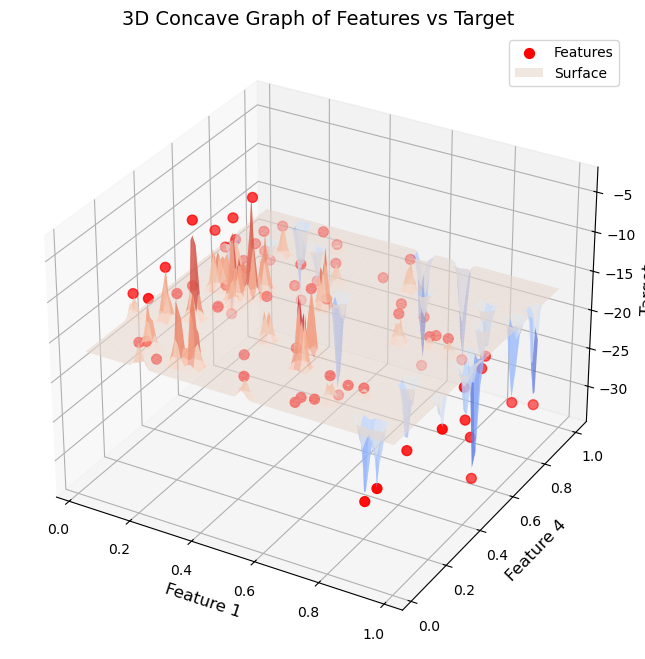

In [43]:
from matplotlib import cm

fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')

# Scatter plot of feature1 and feature2
ax.scatter(df['feature1'], df['feature4'], df['target'], c='red', label='Features', marker='o', s=50)


# Create a meshgrid for the surface plot
X, Y = np.meshgrid(np.linspace(df['feature1'].min(), df['feature1'].max(), 100),
                   np.linspace(df['feature4'].min(), df['feature4'].max(), 100))

# Assuming a simple surface for demonstration; replace with your actual model's predictions
# Example using a Gaussian Process Regressor (you can use any suitable model):
#kernel = 1 * RBF(length_scale=1.0, length_scale_bounds=(1e-2, 1e3))
#gpr_graph = GaussianProcessRegressor(kernel=kernel, random_state=0).fit(df[['feature1', 'feature2']], df['target'])
gpr.fit(df[['feature1', 'feature4']], df['target'])
#Z = gpr_graph.predict(np.column_stack((X.ravel(), Y.ravel()))).reshape(X.shape)
Z = gpr.predict(np.column_stack((X.ravel(), Y.ravel()))).reshape(X.shape)

# Plot the surface
surf = ax.plot_surface(X, Y, Z, cmap=cm.coolwarm, alpha=0.6, label='Surface')

# Customize the plot
ax.set_xlabel('Feature 1', fontsize=12)
ax.set_ylabel('Feature 4', fontsize=12)
ax.set_zlabel('Target', fontsize=12)
ax.set_title('3D Concave Graph of Features vs Target', fontsize=14)
ax.legend()

plt.show()

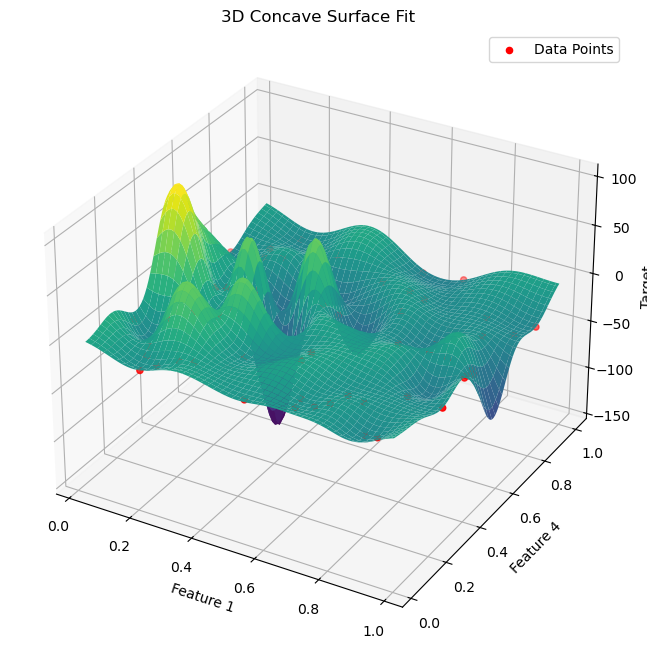

In [45]:
# Fit a concave surface to the plot above

import numpy as np
from scipy.interpolate import Rbf

# Assuming you have your data in 'feature1', 'feature2', and 'target'
feature1 = df['feature1']
feature2 = df['feature4']
target = df['target']

# Create the radial basis function interpolator
rbfi = Rbf(feature1, feature2, target, function='gaussian') # Try different functions like 'multiquadric', 'inverse', 'gaussian', etc.

# Create a grid of points for the surface
xi = np.linspace(feature1.min(), feature1.max(), 100)
yi = np.linspace(feature2.min(), feature2.max(), 100)
xi, yi = np.meshgrid(xi, yi)

# Interpolate the target values on the grid
zi = rbfi(xi, yi)


# Create the figure and axes object
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')


# Plot the surface
ax.plot_surface(xi, yi, zi, cmap='viridis')

# Plot the original data points
ax.scatter(feature1, feature2, target, c='red', marker='o', label='Data Points')


# Set labels and title
ax.set_xlabel('Feature 1')
ax.set_ylabel('Feature 4')
ax.set_zlabel('Target')
ax.set_title('3D Concave Surface Fit')
ax.legend() # Show the legend for the scatter plot
plt.show()

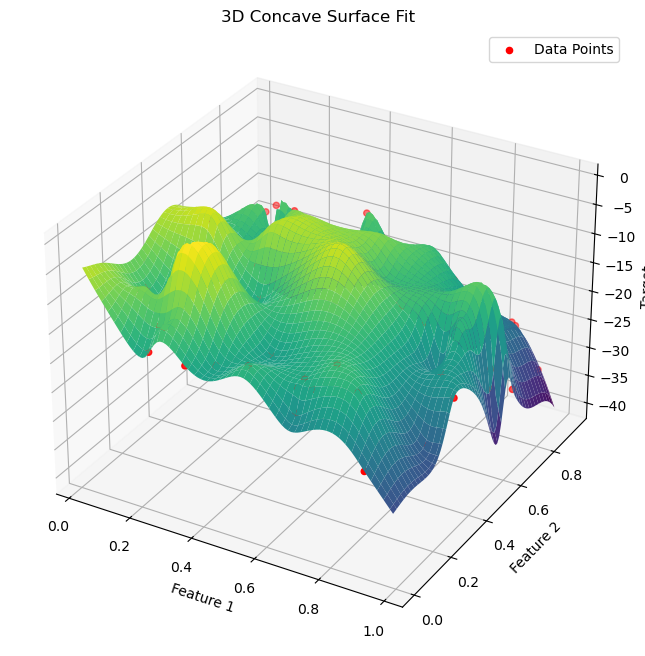

In [47]:
# Fit a concave surface to the plot above

import numpy as np
from scipy.interpolate import Rbf

# Assuming you have your data in 'feature1', 'feature2', and 'target'
feature1 = df['feature1']
feature2 = df['feature2']
target = df['target']

# Create the radial basis function interpolator
rbfi = Rbf(feature1, feature2, target, function='thin_plate') # Try different functions like 'multiquadric', 'inverse', 'gaussian', etc.

# Create a grid of points for the surface
xi = np.linspace(feature1.min(), feature1.max(), 100)
yi = np.linspace(feature2.min(), feature2.max(), 100)
xi, yi = np.meshgrid(xi, yi)

# Interpolate the target values on the grid
zi = rbfi(xi, yi)


# Create the figure and axes object
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')


# Plot the surface
ax.plot_surface(xi, yi, zi, cmap='viridis')

# Plot the original data points
ax.scatter(feature1, feature2, target, c='red', marker='o', label='Data Points')


# Set labels and title
ax.set_xlabel('Feature 1')
ax.set_ylabel('Feature 2')
ax.set_zlabel('Target')
ax.set_title('3D Concave Surface Fit')
ax.legend() # Show the legend for the scatter plot
plt.show()

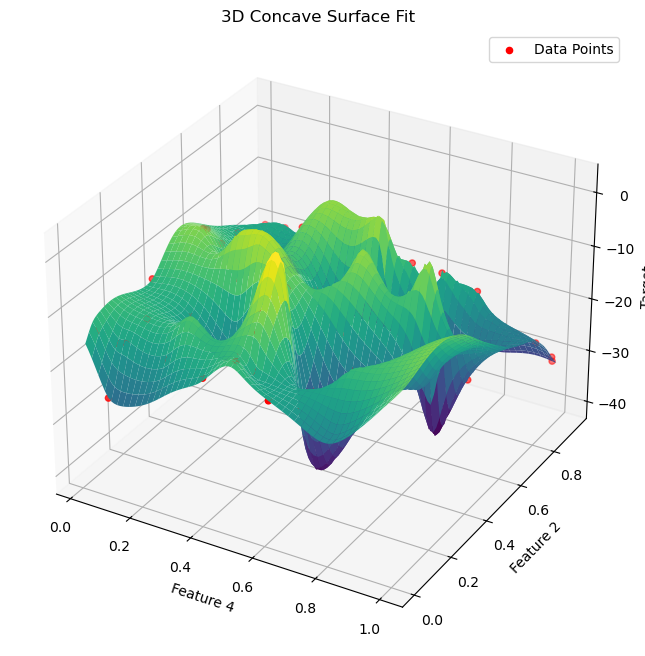

In [49]:
#Fit a concave surface to the plot above

import numpy as np
from scipy.interpolate import Rbf

# Assuming you have your data in 'feature1', 'feature2', and 'target'
feature1 = df['feature4']
feature2 = df['feature2']
target = df['target']

# Create the radial basis function interpolator
rbfi = Rbf(feature1, feature2, target, function='thin_plate') # Try different functions like 'multiquadric', 'inverse', 'gaussian', etc.

# Create a grid of points for the surface
xi = np.linspace(feature1.min(), feature1.max(), 100)
yi = np.linspace(feature2.min(), feature2.max(), 100)
xi, yi = np.meshgrid(xi, yi)

# Interpolate the target values on the grid
zi = rbfi(xi, yi)


# Create the figure and axes object
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')


# Plot the surface
ax.plot_surface(xi, yi, zi, cmap='viridis')

# Plot the original data points
ax.scatter(feature1, feature2, target, c='red', marker='o', label='Data Points')


# Set labels and title
ax.set_xlabel('Feature 4')
ax.set_ylabel('Feature 2')
ax.set_zlabel('Target')
ax.set_title('3D Concave Surface Fit')
ax.legend() # Show the legend for the scatter plot
plt.show()

/opt/anaconda3/lib/python3.12/site-packages/sklearn/gaussian_process/kernels.py:445: ConvergenceWarning: The optimal value found for dimension 0 of parameter k2__length_scale is close to the specified lower bound 0.01. Decreasing the bound and calling fit again may find a better value.
  warnings.warn(
/opt/anaconda3/lib/python3.12/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but GaussianProcessRegressor was fitted with feature names
  warnings.warn(


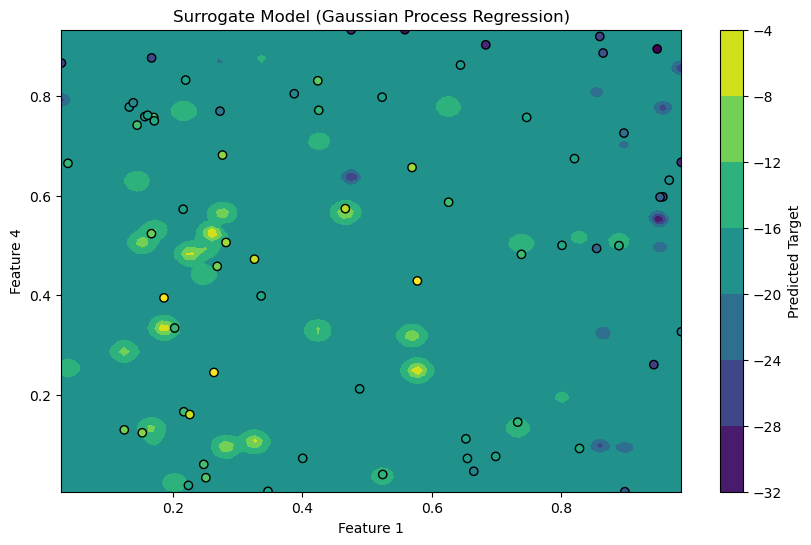

In [51]:
# Assuming 'inputs' and 'outputs' are defined as in the provided code.
X = df[['feature1', 'feature4']]
y = df[['target']]

# Create the Gaussian Process Regressor
#kernel = RBF(length_scale=1.0)  # You can adjust the length_scale parameter
#gpr = GaussianProcessRegressor(kernel=kernel, random_state=0)

# Fit the GPR model to the data
gpr.fit(X, y)

# Create a grid of points for prediction
x1_grid = np.linspace(min(inputs[:, 0]), max(inputs[:, 0]), 100)
x2_grid = np.linspace(min(inputs[:, 1]), max(inputs[:, 1]), 100)
x1_grid, x2_grid = np.meshgrid(x1_grid, x2_grid)
grid_points = np.column_stack([x1_grid.flatten(), x2_grid.flatten()])


# Predict the target values and standard deviations at the grid points
y_pred, sigma = gpr.predict(grid_points, return_std=True)

# Reshape predictions for plotting
y_pred = y_pred.reshape(x1_grid.shape)
sigma = sigma.reshape(x1_grid.shape)

# Create the plot
plt.figure(figsize=(10, 6))
contour = plt.contourf(x1_grid, x2_grid, y_pred, cmap='viridis')
plt.colorbar(contour, label='Predicted Target')

# Plot the original data points
plt.scatter(inputs[:, 0], inputs[:, 1], c=outputs, cmap='viridis', edgecolor='k', label='Samples')

# Add a title and labels
plt.title('Surrogate Model (Gaussian Process Regression)')
plt.xlabel('Feature 1')
plt.ylabel('Feature 4')

# Show the plot
plt.show()

/opt/anaconda3/lib/python3.12/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but GaussianProcessRegressor was fitted with feature names
  warnings.warn(


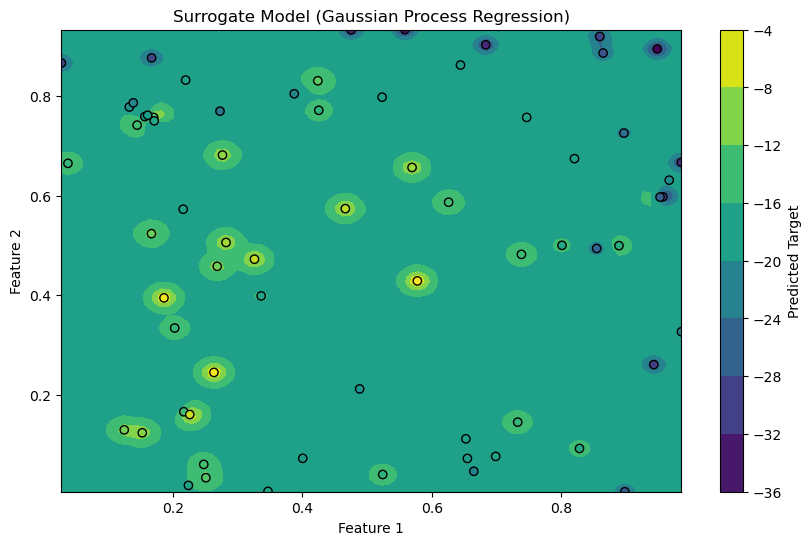

In [53]:
# Assuming 'inputs' and 'outputs' are defined as in the provided code.
X = df[['feature1', 'feature2']]
y = df[['target']]

# Create the Gaussian Process Regressor
#kernel = RBF(length_scale=1.0)  # You can adjust the length_scale parameter
#gpr = GaussianProcessRegressor(kernel=kernel, random_state=0)

# Fit the GPR model to the data
gpr.fit(X, y)

# Create a grid of points for prediction
x1_grid = np.linspace(min(inputs[:, 0]), max(inputs[:, 0]), 100)
x2_grid = np.linspace(min(inputs[:, 1]), max(inputs[:, 1]), 100)
x1_grid, x2_grid = np.meshgrid(x1_grid, x2_grid)
grid_points = np.column_stack([x1_grid.flatten(), x2_grid.flatten()])


# Predict the target values and standard deviations at the grid points
y_pred, sigma = gpr.predict(grid_points, return_std=True)

# Reshape predictions for plotting
y_pred = y_pred.reshape(x1_grid.shape)
sigma = sigma.reshape(x1_grid.shape)

# Create the plot
plt.figure(figsize=(10, 6))
contour = plt.contourf(x1_grid, x2_grid, y_pred, cmap='viridis')
plt.colorbar(contour, label='Predicted Target')

# Plot the original data points
plt.scatter(inputs[:, 0], inputs[:, 1], c=outputs, cmap='viridis', edgecolor='k', label='Samples')

# Add a title and labels
plt.title('Surrogate Model (Gaussian Process Regression)')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')

# Show the plot
plt.show()

/opt/anaconda3/lib/python3.12/site-packages/sklearn/gaussian_process/kernels.py:445: ConvergenceWarning: The optimal value found for dimension 0 of parameter k2__length_scale is close to the specified lower bound 0.01. Decreasing the bound and calling fit again may find a better value.
  warnings.warn(
/opt/anaconda3/lib/python3.12/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but GaussianProcessRegressor was fitted with feature names
  warnings.warn(


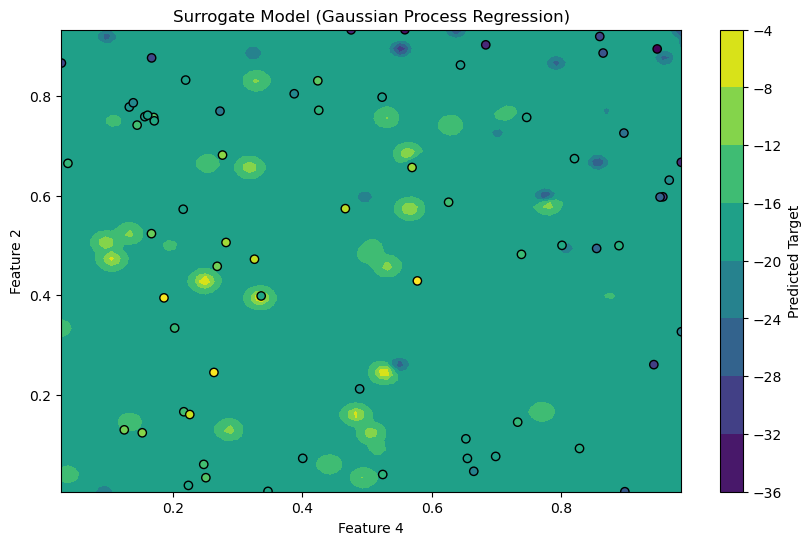

In [55]:
# Assuming 'inputs' and 'outputs' are defined as in the provided code.
X = df[['feature4', 'feature2']]
y = df[['target']]

# Create the Gaussian Process Regressor
#kernel = RBF(length_scale=1.0)  # You can adjust the length_scale parameter
#gpr = GaussianProcessRegressor(kernel=kernel, random_state=0)

# Fit the GPR model to the data
gpr.fit(X, y)

# Create a grid of points for prediction
x1_grid = np.linspace(min(inputs[:, 0]), max(inputs[:, 0]), 100)
x2_grid = np.linspace(min(inputs[:, 1]), max(inputs[:, 1]), 100)
x1_grid, x2_grid = np.meshgrid(x1_grid, x2_grid)
grid_points = np.column_stack([x1_grid.flatten(), x2_grid.flatten()])


# Predict the target values and standard deviations at the grid points
y_pred, sigma = gpr.predict(grid_points, return_std=True)

# Reshape predictions for plotting
y_pred = y_pred.reshape(x1_grid.shape)
sigma = sigma.reshape(x1_grid.shape)

# Create the plot
plt.figure(figsize=(10, 6))
contour = plt.contourf(x1_grid, x2_grid, y_pred, cmap='viridis')
plt.colorbar(contour, label='Predicted Target')

# Plot the original data points
plt.scatter(inputs[:, 0], inputs[:, 1], c=outputs, cmap='viridis', edgecolor='k', label='Samples')

# Add a title and labels
plt.title('Surrogate Model (Gaussian Process Regression)')
plt.xlabel('Feature 4')
plt.ylabel('Feature 2')

# Show the plot
plt.show()

/opt/anaconda3/lib/python3.12/site-packages/sklearn/gaussian_process/kernels.py:445: ConvergenceWarning: The optimal value found for dimension 0 of parameter k2__length_scale is close to the specified lower bound 0.01. Decreasing the bound and calling fit again may find a better value.
  warnings.warn(


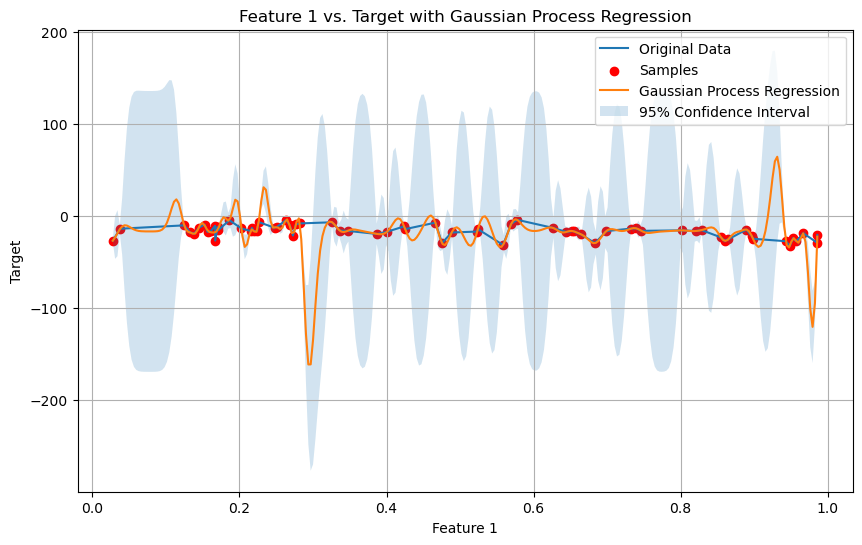

11.4**2 * RBF(length_scale=0.01)


In [57]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.gaussian_process import GaussianProcessRegressor
from sklearn.gaussian_process.kernels import RBF, ConstantKernel as C

# Assuming df is already defined as in your provided code
# Sort the DataFrame by 'feature1'
df_sorted = df.sort_values('feature1')

# Prepare the data for the Gaussian Process Regressor
X = df_sorted[['feature1']].values  # Use only 'feature1' as input
y = df_sorted['target'].values

# Define a more flexible kernel
#kernel = C(1.0, (1e-3, 1e3)) * RBF(10, (1e-2, 1e2)) # Increased flexibility

# Create and fit the Gaussian Process Regressor
#gpr = GaussianProcessRegressor(kernel=kernel, alpha=1e-5, n_restarts_optimizer=10, random_state=0)
# Increased n_restarts_optimizer for better hyperparameter optimization
# Added a small amount of noise to the target variable using alpha.
gpr.fit(X, y)

# Predict target values and their standard deviations
X_pred = np.linspace(X.min(), X.max(), 300).reshape(-1, 1)  # More prediction points for smoother curve
y_pred, sigma = gpr.predict(X_pred, return_std=True)

# Plot the results
plt.figure(figsize=(10, 6))
plt.plot(df_sorted['feature1'], df_sorted['target'], linestyle='-', label='Original Data')
plt.scatter(df_sorted['feature1'], df_sorted['target'], color='red', label='Samples')
plt.plot(X_pred, y_pred, label='Gaussian Process Regression')
plt.fill_between(X_pred.flatten(), y_pred - 1.96 * sigma, y_pred + 1.96 * sigma, alpha=0.2, label='95% Confidence Interval')
plt.xlabel('Feature 1')
plt.ylabel('Target')
plt.title('Feature 1 vs. Target with Gaussian Process Regression')
plt.legend()
plt.grid(True)
plt.show()

print(gpr.kernel_) # Print the optimized kernel parameters

/opt/anaconda3/lib/python3.12/site-packages/sklearn/gaussian_process/kernels.py:445: ConvergenceWarning: The optimal value found for dimension 0 of parameter k2__length_scale is close to the specified lower bound 0.01. Decreasing the bound and calling fit again may find a better value.
  warnings.warn(


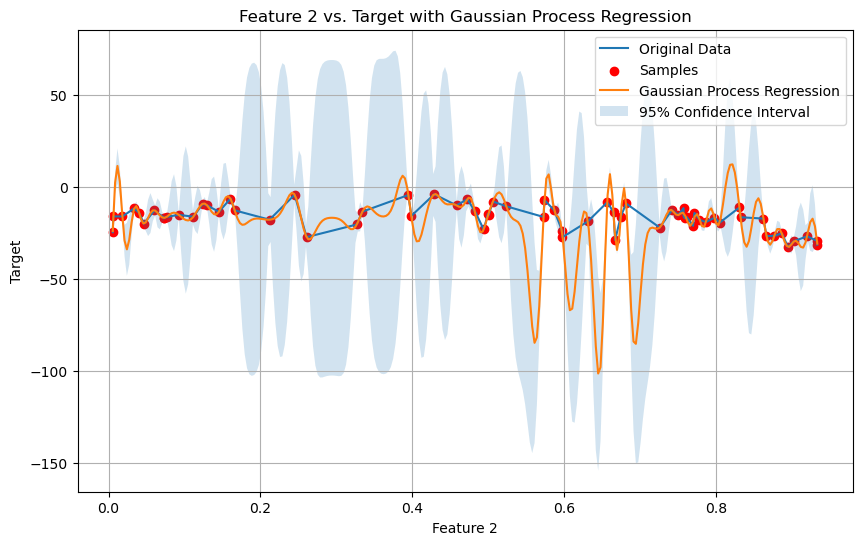

6.42**2 * RBF(length_scale=0.01)


In [59]:
# Assuming df is already defined as in your provided code
# Sort the DataFrame by 'feature2'
df_sorted = df.sort_values('feature2')

# Prepare the data for the Gaussian Process Regressor
X = df_sorted[['feature2']].values  # Use only 'feature1' as input
y = df_sorted['target'].values

# Define a more flexible kernel
#kernel = C(1.0, (1e-3, 1e3)) * RBF(10, (1e-2, 1e2)) # Increased flexibility

# Create and fit the Gaussian Process Regressor
#gpr = GaussianProcessRegressor(kernel=kernel, alpha=1e-5, n_restarts_optimizer=10, random_state=0)
# Increased n_restarts_optimizer for better hyperparameter optimization
# Added a small amount of noise to the target variable using alpha.
gpr.fit(X, y)

# Predict target values and their standard deviations
X_pred = np.linspace(X.min(), X.max(), 300).reshape(-1, 1)  # More prediction points for smoother curve
y_pred, sigma = gpr.predict(X_pred, return_std=True)

# Plot the results
plt.figure(figsize=(10, 6))
plt.plot(df_sorted['feature2'], df_sorted['target'], linestyle='-', label='Original Data')
plt.scatter(df_sorted['feature2'], df_sorted['target'], color='red', label='Samples')
plt.plot(X_pred, y_pred, label='Gaussian Process Regression')
plt.fill_between(X_pred.flatten(), y_pred - 1.96 * sigma, y_pred + 1.96 * sigma, alpha=0.2, label='95% Confidence Interval')
plt.xlabel('Feature 2')
plt.ylabel('Target')
plt.title('Feature 2 vs. Target with Gaussian Process Regression')
plt.legend()
plt.grid(True)
plt.show()

print(gpr.kernel_) # Print the optimized kernel parameters

/opt/anaconda3/lib/python3.12/site-packages/sklearn/gaussian_process/kernels.py:445: ConvergenceWarning: The optimal value found for dimension 0 of parameter k2__length_scale is close to the specified lower bound 0.01. Decreasing the bound and calling fit again may find a better value.
  warnings.warn(


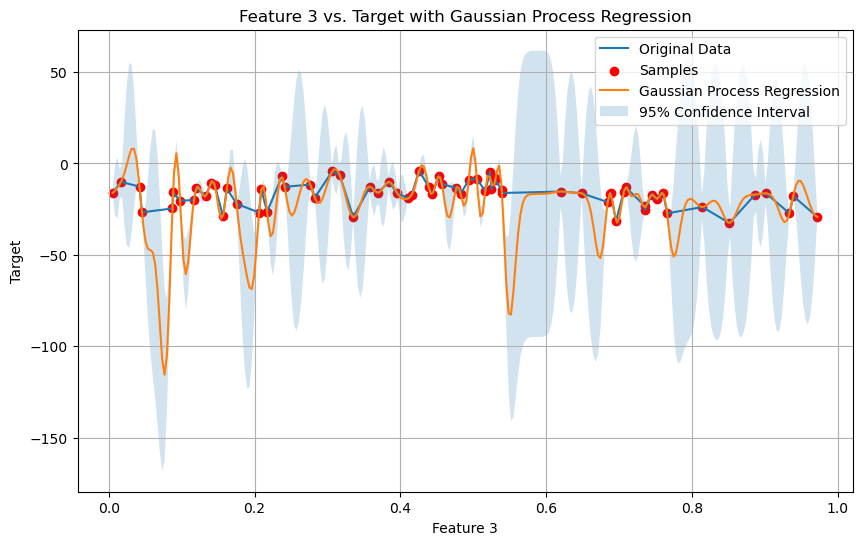

5.87**2 * RBF(length_scale=0.01)


In [61]:
# Assuming df is already defined as in your provided code
# Sort the DataFrame by 'feature3'
df_sorted = df.sort_values('feature3')

# Prepare the data for the Gaussian Process Regressor
X = df_sorted[['feature3']].values  # Use only 'feature1' as input
y = df_sorted['target'].values

# Define a more flexible kernel
#kernel = C(1.0, (1e-3, 1e3)) * RBF(10, (1e-2, 1e2)) # Increased flexibility

# Create and fit the Gaussian Process Regressor
#gpr = GaussianProcessRegressor(kernel=kernel, alpha=1e-5, n_restarts_optimizer=10, random_state=0)
# Increased n_restarts_optimizer for better hyperparameter optimization
# Added a small amount of noise to the target variable using alpha.
gpr.fit(X, y)

# Predict target values and their standard deviations
X_pred = np.linspace(X.min(), X.max(), 300).reshape(-1, 1)  # More prediction points for smoother curve
y_pred, sigma = gpr.predict(X_pred, return_std=True)

# Plot the results
plt.figure(figsize=(10, 6))
plt.plot(df_sorted['feature3'], df_sorted['target'], linestyle='-', label='Original Data')
plt.scatter(df_sorted['feature3'], df_sorted['target'], color='red', label='Samples')
plt.plot(X_pred, y_pred, label='Gaussian Process Regression')
plt.fill_between(X_pred.flatten(), y_pred - 1.96 * sigma, y_pred + 1.96 * sigma, alpha=0.2, label='95% Confidence Interval')
plt.xlabel('Feature 3')
plt.ylabel('Target')
plt.title('Feature 3 vs. Target with Gaussian Process Regression')
plt.legend()
plt.grid(True)
plt.show()

print(gpr.kernel_) # Print the optimized kernel parameters

/opt/anaconda3/lib/python3.12/site-packages/sklearn/gaussian_process/kernels.py:455: ConvergenceWarning: The optimal value found for dimension 0 of parameter k1__constant_value is close to the specified upper bound 1000.0. Increasing the bound and calling fit again may find a better value.
  warnings.warn(
/opt/anaconda3/lib/python3.12/site-packages/sklearn/gaussian_process/kernels.py:445: ConvergenceWarning: The optimal value found for dimension 0 of parameter k2__length_scale is close to the specified lower bound 0.01. Decreasing the bound and calling fit again may find a better value.
  warnings.warn(


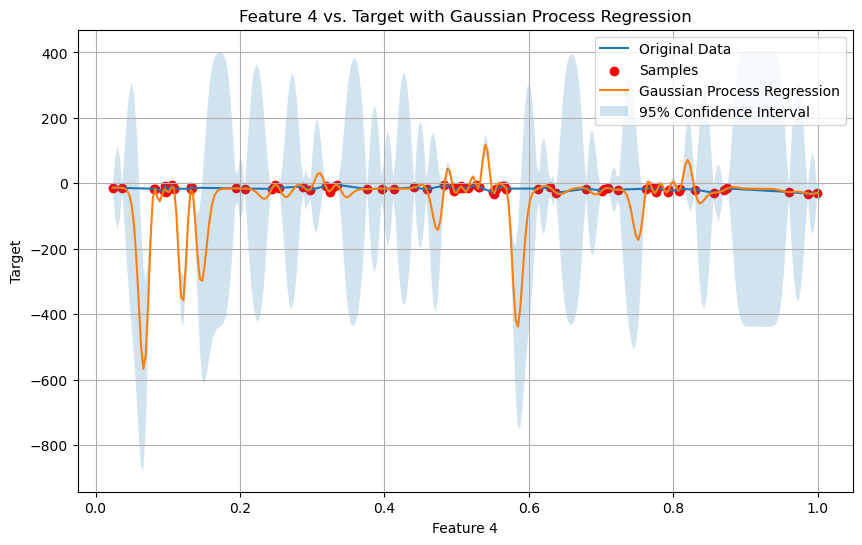

31.6**2 * RBF(length_scale=0.01)


In [63]:
# Assuming df is already defined as in your provided code
# Sort the DataFrame by 'feature4'
df_sorted = df.sort_values('feature4')

# Prepare the data for the Gaussian Process Regressor
X = df_sorted[['feature4']].values  # Use only 'feature1' as input
y = df_sorted['target'].values

# Define a more flexible kernel
#kernel = C(1.0, (1e-3, 1e3)) * RBF(10, (1e-2, 1e2)) # Increased flexibility

# Create and fit the Gaussian Process Regressor
#gpr = GaussianProcessRegressor(kernel=kernel, alpha=1e-5, n_restarts_optimizer=10, random_state=0)
# Increased n_restarts_optimizer for better hyperparameter optimization
# Added a small amount of noise to the target variable using alpha.
gpr.fit(X, y)

# Predict target values and their standard deviations
X_pred = np.linspace(X.min(), X.max(), 300).reshape(-1, 1)  # More prediction points for smoother curve
y_pred, sigma = gpr.predict(X_pred, return_std=True)

# Plot the results
plt.figure(figsize=(10, 6))
plt.plot(df_sorted['feature4'], df_sorted['target'], linestyle='-', label='Original Data')
plt.scatter(df_sorted['feature4'], df_sorted['target'], color='red', label='Samples')
plt.plot(X_pred, y_pred, label='Gaussian Process Regression')
plt.fill_between(X_pred.flatten(), y_pred - 1.96 * sigma, y_pred + 1.96 * sigma, alpha=0.2, label='95% Confidence Interval')
plt.xlabel('Feature 4')
plt.ylabel('Target')
plt.title('Feature 4 vs. Target with Gaussian Process Regression')
plt.legend()
plt.grid(True)
plt.show()

print(gpr.kernel_) # Print the optimized kernel parameters

In [65]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.gaussian_process import GaussianProcessRegressor
from sklearn.gaussian_process.kernels import RBF
from scipy.stats import norm

def expected_improvement(X, gpr, xi=0.01):
    mu, sigma = gpr.predict(X, return_std=True)
    mu_sample_opt = np.max(gpr.y_train_)
    with np.errstate(divide='ignore'):
        Z = (mu - mu_sample_opt - xi) / sigma
        ei = (mu - mu_sample_opt - xi) * norm.cdf(Z) + sigma * norm.pdf(Z)
        ei[sigma == 0.0] = 0.0
    return ei

/opt/anaconda3/lib/python3.12/site-packages/sklearn/gaussian_process/kernels.py:445: ConvergenceWarning: The optimal value found for dimension 0 of parameter k2__length_scale is close to the specified lower bound 0.01. Decreasing the bound and calling fit again may find a better value.
  warnings.warn(


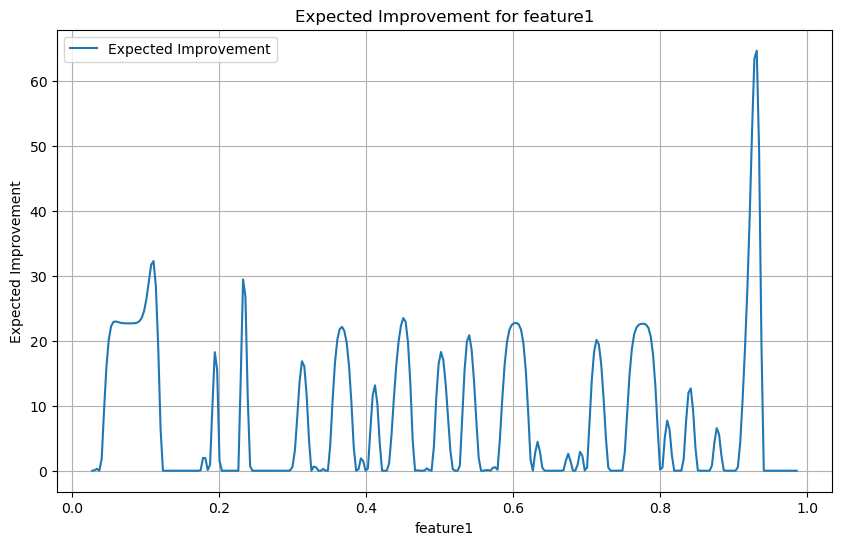

/opt/anaconda3/lib/python3.12/site-packages/sklearn/gaussian_process/kernels.py:445: ConvergenceWarning: The optimal value found for dimension 0 of parameter k2__length_scale is close to the specified lower bound 0.01. Decreasing the bound and calling fit again may find a better value.
  warnings.warn(


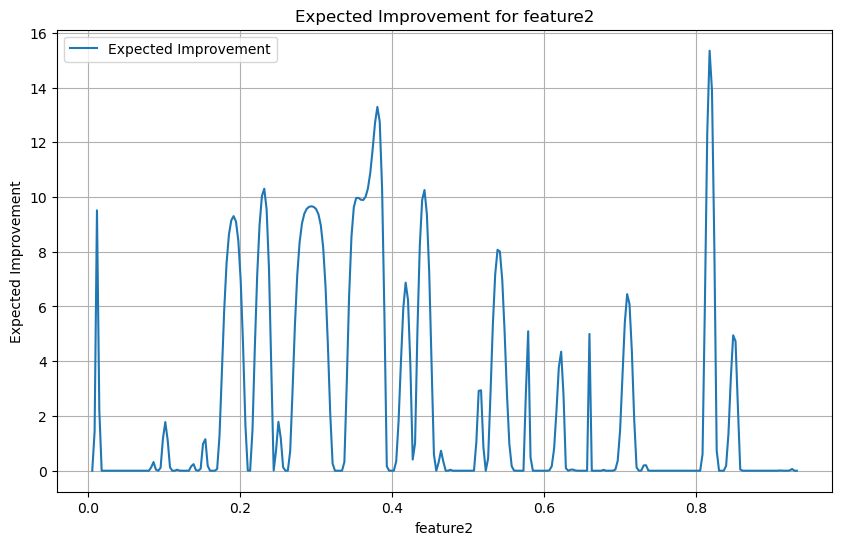

/opt/anaconda3/lib/python3.12/site-packages/sklearn/gaussian_process/kernels.py:445: ConvergenceWarning: The optimal value found for dimension 0 of parameter k2__length_scale is close to the specified lower bound 0.01. Decreasing the bound and calling fit again may find a better value.
  warnings.warn(


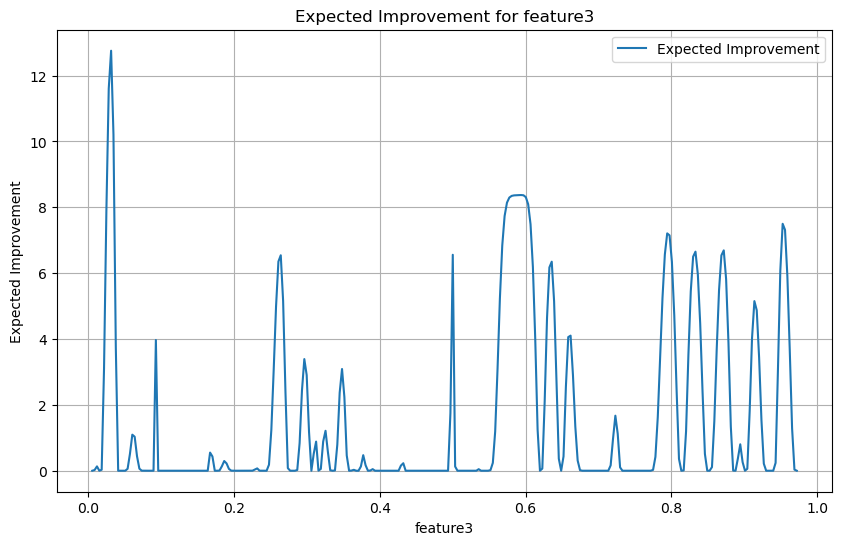

/opt/anaconda3/lib/python3.12/site-packages/sklearn/gaussian_process/kernels.py:455: ConvergenceWarning: The optimal value found for dimension 0 of parameter k1__constant_value is close to the specified upper bound 1000.0. Increasing the bound and calling fit again may find a better value.
  warnings.warn(
/opt/anaconda3/lib/python3.12/site-packages/sklearn/gaussian_process/kernels.py:445: ConvergenceWarning: The optimal value found for dimension 0 of parameter k2__length_scale is close to the specified lower bound 0.01. Decreasing the bound and calling fit again may find a better value.
  warnings.warn(


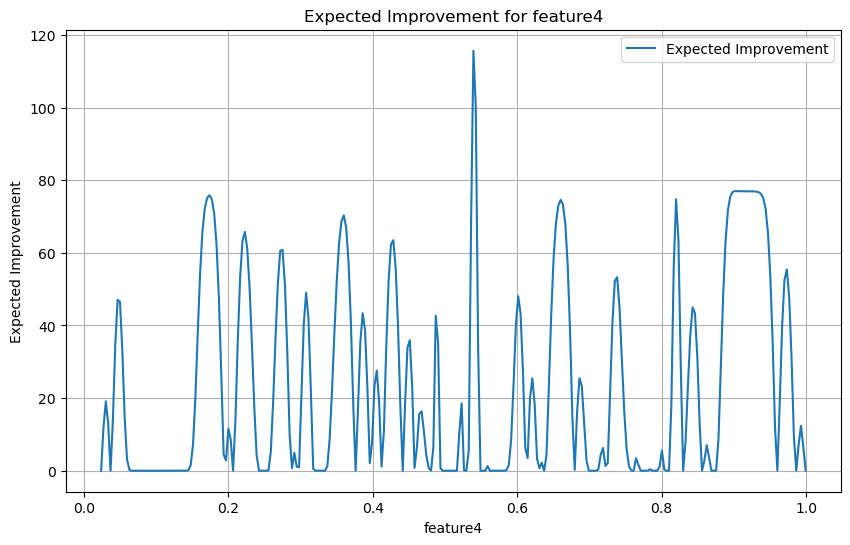

In [67]:
from sklearn.gaussian_process import GaussianProcessRegressor
from sklearn.gaussian_process.kernels import RBF, ConstantKernel as C
from scipy.stats import norm
import numpy as np
import matplotlib.pyplot as plt

#Expected Improvement Calculation with more robust handling

def expected_improvement(X, gpr, xi=0.01):
    mu, sigma = gpr.predict(X, return_std=True)
    mu_sample_opt = np.max(gpr.y_train_)
    with np.errstate(divide='warn'):  # Use 'warn' instead of 'ignore'
      Z = (mu - mu_sample_opt - xi) / sigma
      ei = (mu - mu_sample_opt - xi) * norm.cdf(Z) + sigma * norm.pdf(Z)
      # Handle cases where sigma is zero more gracefully
      ei[sigma == 0.0] = 0.0  
      ei[sigma < 1e-6] = 0.0  # Avoid numerical issues for near-zero sigma

    return ei


# Calculate and plot expected improvement for each feature
for feature_name in ['feature1', 'feature2', 'feature3', 'feature4']:
    # Prepare the data for the Gaussian Process Regressor
    X = df[[feature_name]].values
    y = df['target'].values
    
    # Use a more complex kernel for better fitting
    #kernel = C(1.0, (1e-3, 1e3)) * RBF(10, (1e-2, 1e2))

    # Create and fit the Gaussian Process Regressor
    #gpr = GaussianProcessRegressor(kernel=kernel, alpha=1e-5, n_restarts_optimizer=10, random_state=0)
    gpr.fit(X, y)

    # Generate points for prediction
    X_pred = np.linspace(X.min(), X.max(), 300).reshape(-1, 1) # Increased prediction points

    # Calculate expected improvement with the improved function
    ei = expected_improvement(X_pred, gpr)

    # Plot the results
    plt.figure(figsize=(10, 6))
    plt.plot(X_pred, ei, label='Expected Improvement')
    plt.xlabel(feature_name)
    plt.ylabel('Expected Improvement')
    plt.title(f'Expected Improvement for {feature_name}')
    plt.legend()
    plt.grid(True)
    plt.show()

/opt/anaconda3/lib/python3.12/site-packages/sklearn/gaussian_process/_gpr.py:663: ConvergenceWarning: lbfgs failed to converge (status=2):
ABNORMAL_TERMINATION_IN_LNSRCH.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  _check_optimize_result("lbfgs", opt_res)
/opt/anaconda3/lib/python3.12/site-packages/sklearn/gaussian_process/kernels.py:445: ConvergenceWarning: The optimal value found for dimension 0 of parameter k2__length_scale is close to the specified lower bound 0.01. Decreasing the bound and calling fit again may find a better value.
  warnings.warn(


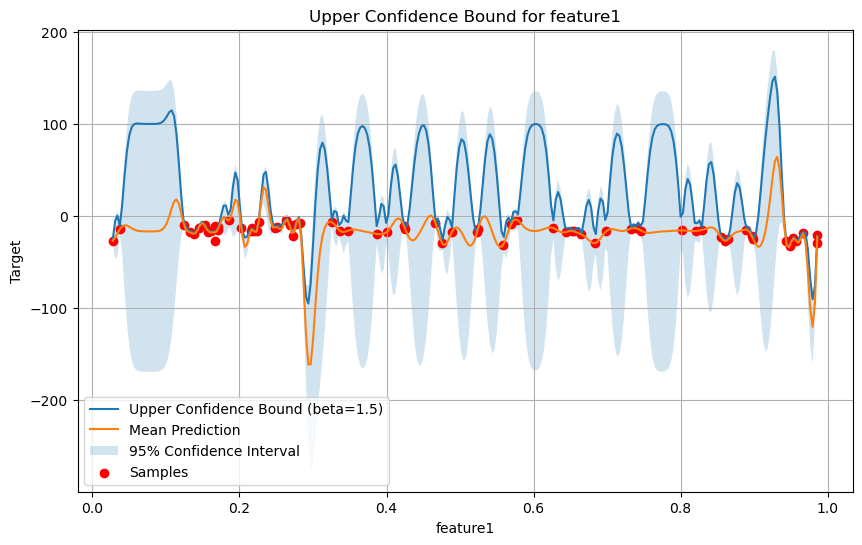

/opt/anaconda3/lib/python3.12/site-packages/sklearn/gaussian_process/kernels.py:445: ConvergenceWarning: The optimal value found for dimension 0 of parameter k2__length_scale is close to the specified lower bound 0.01. Decreasing the bound and calling fit again may find a better value.
  warnings.warn(


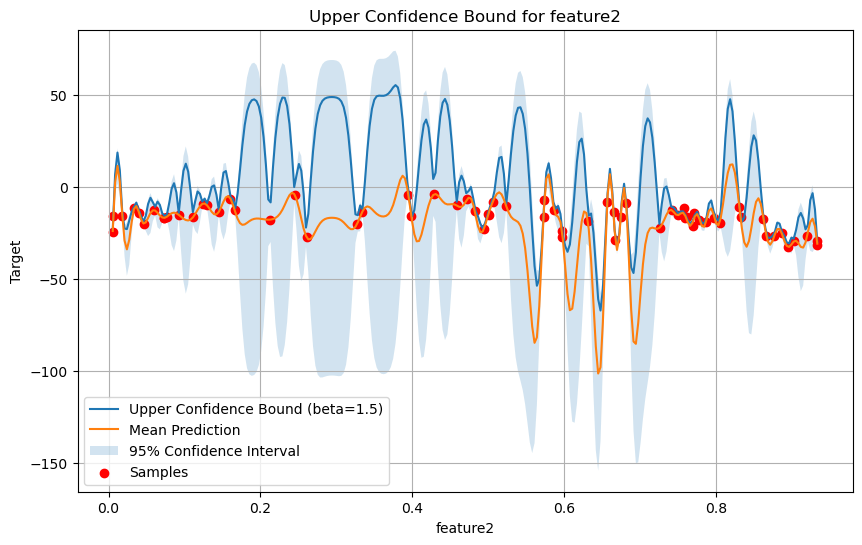

/opt/anaconda3/lib/python3.12/site-packages/sklearn/gaussian_process/_gpr.py:663: ConvergenceWarning: lbfgs failed to converge (status=2):
ABNORMAL_TERMINATION_IN_LNSRCH.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  _check_optimize_result("lbfgs", opt_res)
/opt/anaconda3/lib/python3.12/site-packages/sklearn/gaussian_process/kernels.py:445: ConvergenceWarning: The optimal value found for dimension 0 of parameter k2__length_scale is close to the specified lower bound 0.01. Decreasing the bound and calling fit again may find a better value.
  warnings.warn(


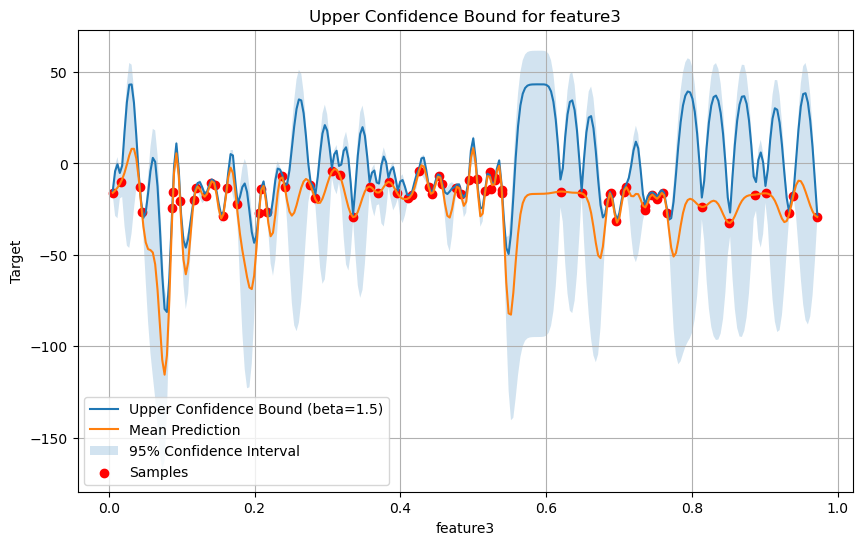

/opt/anaconda3/lib/python3.12/site-packages/sklearn/gaussian_process/kernels.py:455: ConvergenceWarning: The optimal value found for dimension 0 of parameter k1__constant_value is close to the specified upper bound 1000.0. Increasing the bound and calling fit again may find a better value.
  warnings.warn(
/opt/anaconda3/lib/python3.12/site-packages/sklearn/gaussian_process/kernels.py:445: ConvergenceWarning: The optimal value found for dimension 0 of parameter k2__length_scale is close to the specified lower bound 0.01. Decreasing the bound and calling fit again may find a better value.
  warnings.warn(


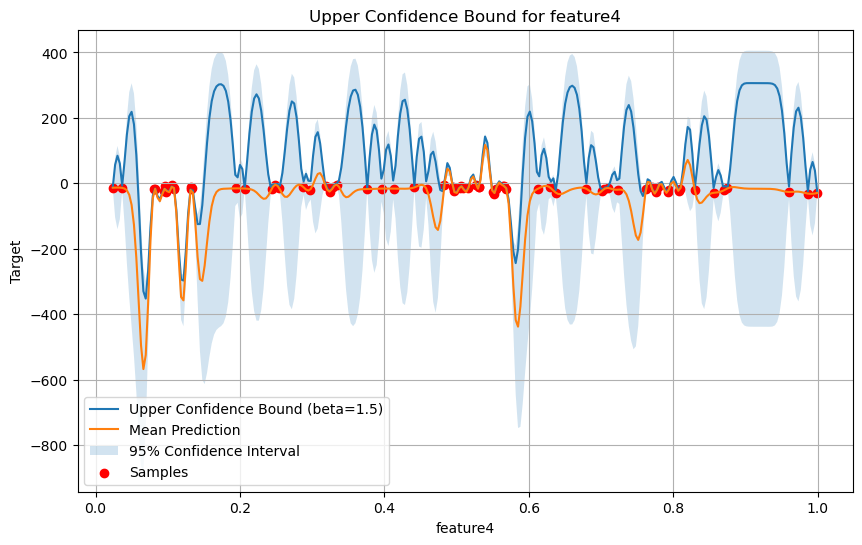

In [69]:
from sklearn.gaussian_process.kernels import ConstantKernel as C
from scipy.stats import norm

# Improved Expected Improvement Calculation with more robust handling
def expected_improvement(X, gpr, xi=0.01):
    mu, sigma = gpr.predict(X, return_std=True)
    mu_sample_opt = np.max(gpr.y_train_)
    with np.errstate(divide='warn'):  # Use 'warn' instead of 'ignore'
      Z = (mu - mu_sample_opt - xi) / sigma
      ei = (mu - mu_sample_opt - xi) * norm.cdf(Z) + sigma * norm.pdf(Z)
      # Handle cases where sigma is zero more gracefully
      ei[sigma == 0.0] = 0.0  
      ei[sigma < 1e-6] = 0.0  # Avoid numerical issues for near-zero sigma

    return ei

# Improved Upper Confidence Bound with adjustable beta and better visualization
def upper_confidence_bound(X, gpr, beta=2.0): # Make beta adjustable
    mu, sigma = gpr.predict(X, return_std=True)
    ucb = mu + beta * sigma
    return mu, sigma, ucb  # Return mu and sigma for plotting


# Calculate and plot UCB for each feature
for feature_name in ['feature1', 'feature2', 'feature3', 'feature4']:
    # Prepare the data
    X = df[[feature_name]].values
    y = df['target'].values
    
    # Use the same kernel as in the GPR fitting for consistency
    #kernel = C(1.0, (1e-3, 1e3)) * RBF(10, (1e-2, 1e2))

    # Create and fit the GPR model
    #gpr = GaussianProcessRegressor(kernel=kernel, alpha=1e-5, n_restarts_optimizer=10, random_state=0)
    gpr.fit(X, y)

    # Generate points for prediction
    X_pred = np.linspace(X.min(), X.max(), 300).reshape(-1, 1) # Increased prediction points for smoother curve

    # Calculate UCB, mu, and sigma
    mu, sigma, ucb = upper_confidence_bound(X_pred, gpr, beta=1.5) # Example beta value. Adjust as needed.

    # Plot the results with improved visualization
    plt.figure(figsize=(10, 6))
    plt.plot(X_pred, ucb, label='Upper Confidence Bound (beta=1.5)') # Show beta value
    plt.plot(X_pred, mu, label='Mean Prediction') # Plot the mean
    plt.fill_between(X_pred.flatten(), mu - 1.96 * sigma, mu + 1.96 * sigma, alpha=0.2, label='95% Confidence Interval') # Show Confidence Interval
    plt.scatter(X, y, color='red', label='Samples') # Original Data
    plt.xlabel(feature_name)
    plt.ylabel('Target')
    plt.title(f'Upper Confidence Bound for {feature_name}')
    plt.legend()
    plt.grid(True)
    plt.show()

/opt/anaconda3/lib/python3.12/site-packages/sklearn/gaussian_process/_gpr.py:663: ConvergenceWarning: lbfgs failed to converge (status=2):
ABNORMAL_TERMINATION_IN_LNSRCH.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  _check_optimize_result("lbfgs", opt_res)
/opt/anaconda3/lib/python3.12/site-packages/sklearn/gaussian_process/kernels.py:445: ConvergenceWarning: The optimal value found for dimension 0 of parameter k2__length_scale is close to the specified lower bound 0.01. Decreasing the bound and calling fit again may find a better value.
  warnings.warn(


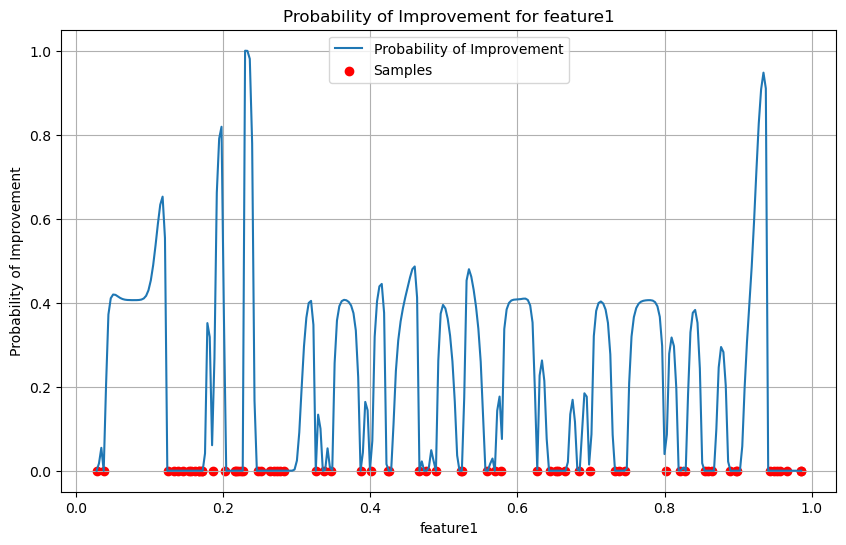

/opt/anaconda3/lib/python3.12/site-packages/sklearn/gaussian_process/kernels.py:445: ConvergenceWarning: The optimal value found for dimension 0 of parameter k2__length_scale is close to the specified lower bound 0.01. Decreasing the bound and calling fit again may find a better value.
  warnings.warn(


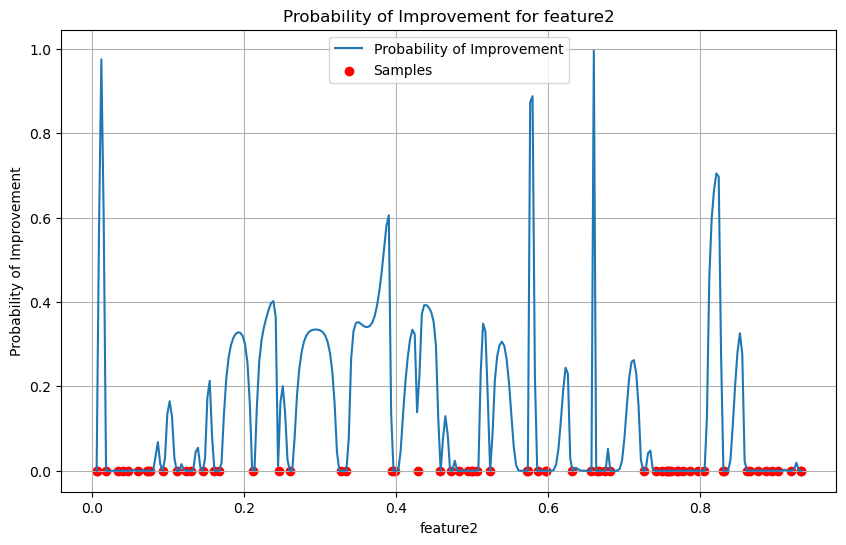

/opt/anaconda3/lib/python3.12/site-packages/sklearn/gaussian_process/kernels.py:445: ConvergenceWarning: The optimal value found for dimension 0 of parameter k2__length_scale is close to the specified lower bound 0.01. Decreasing the bound and calling fit again may find a better value.
  warnings.warn(


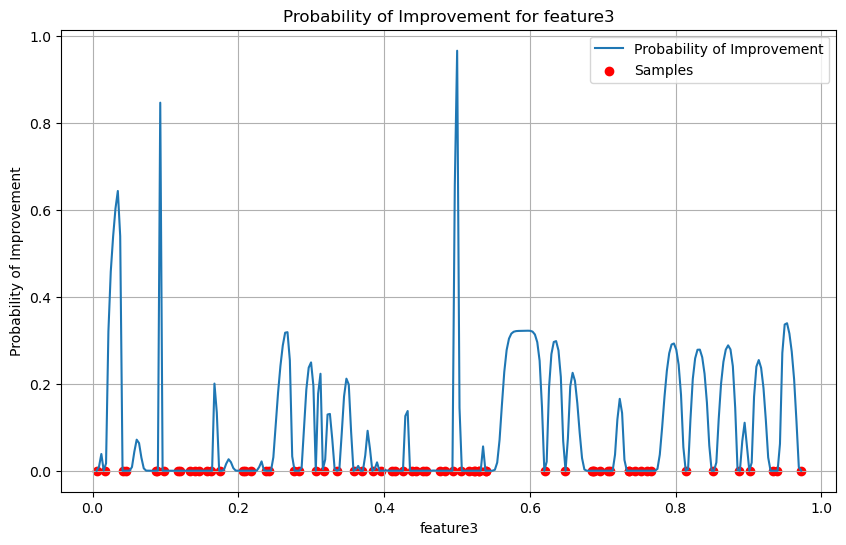

/opt/anaconda3/lib/python3.12/site-packages/sklearn/gaussian_process/kernels.py:455: ConvergenceWarning: The optimal value found for dimension 0 of parameter k1__constant_value is close to the specified upper bound 1000.0. Increasing the bound and calling fit again may find a better value.
  warnings.warn(
/opt/anaconda3/lib/python3.12/site-packages/sklearn/gaussian_process/kernels.py:445: ConvergenceWarning: The optimal value found for dimension 0 of parameter k2__length_scale is close to the specified lower bound 0.01. Decreasing the bound and calling fit again may find a better value.
  warnings.warn(


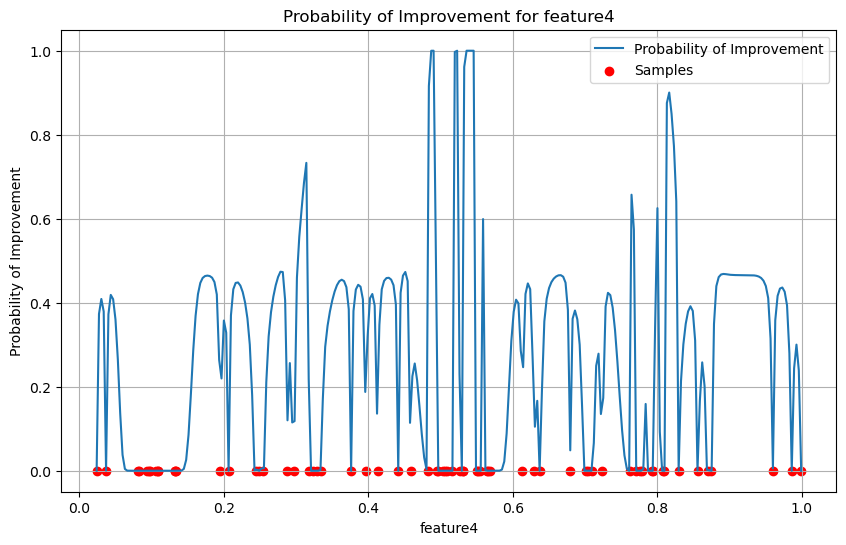

In [71]:
from scipy.stats import norm
from sklearn.gaussian_process.kernels import ConstantKernel as C

# Improved Probability of Improvement Calculation
def probability_of_improvement(X, gpr, xi=0.01):
    mu, sigma = gpr.predict(X, return_std=True)
    mu_sample_opt = np.max(gpr.y_train_)
    with np.errstate(divide='warn'):  # Use 'warn' instead of 'ignore'
        Z = (mu - mu_sample_opt - xi) / sigma
        pi = norm.cdf(Z)
        # Handle cases where sigma is zero or very small
        pi[sigma == 0.0] = 0.0
        pi[sigma < 1e-6] = 0.0  # Avoid numerical issues
    return pi

# Calculate and plot Probability of Improvement for each feature
for feature_name in ['feature1', 'feature2', 'feature3', 'feature4']:
    # Prepare the data
    X = df[[feature_name]].values
    y = df['target'].values

    # Use a more complex kernel for better fitting (same as GPR)
    #kernel = C(1.0, (1e-3, 1e3)) * RBF(10, (1e-2, 1e2))

    # Create and fit the GPR model
    #gpr = GaussianProcessRegressor(kernel=kernel, alpha=1e-5, n_restarts_optimizer=10, random_state=0)
    gpr.fit(X, y)

    # Generate points for prediction
    X_pred = np.linspace(X.min(), X.max(), 300).reshape(-1, 1) # Increased prediction points

    # Calculate PI with improved function
    pi = probability_of_improvement(X_pred, gpr)

    # Plot the results with improved visualization
    plt.figure(figsize=(10, 6))
    plt.plot(X_pred, pi, label='Probability of Improvement')
    plt.xlabel(feature_name)
    plt.ylabel('Probability of Improvement')
    plt.title(f'Probability of Improvement for {feature_name}')
    plt.scatter(X, np.zeros_like(X), color='red', label='Samples')
    plt.legend()
    plt.grid(True)
    plt.show()

In [73]:
print('Running.......')

# Improved Expected Improvement Calculation with more robust handling
def expected_improvement(X, gpr, xi=0.01):
    mu, sigma = gpr.predict(X, return_std=True)
    mu_sample_opt = np.max(gpr.y_train_)
    with np.errstate(divide='warn'):  # Use 'warn' instead of 'ignore'
        Z = (mu - mu_sample_opt - xi) / sigma
        ei = (mu - mu_sample_opt - xi) * norm.cdf(Z) + sigma * norm.pdf(Z)
        # Handle cases where sigma is zero or very small
        ei[sigma == 0.0] = 0.0
        ei[sigma < 1e-6] = 0.0  # Avoid numerical issues
    return ei

# Find the feature1 value with the maximum Expected Improvement
for feature_name in ['feature1']: # Only for feature1
    X = df[[feature_name]].values
    y = df['target'].values
    #kernel = C(1.0, (1e-3, 1e3)) * RBF(10, (1e-2, 1e2))
    #gpr = GaussianProcessRegressor(kernel=kernel, alpha=1e-5, n_restarts_optimizer=10, random_state=0)
    gpr.fit(X, y)
    X_pred = np.linspace(X.min(), X.max(), 300).reshape(-1, 1)
    ei = expected_improvement(X_pred, gpr)
    best_feature1_ei = X_pred[np.argmax(ei)][0]
    print(f"Best feature1 for Expected Improvement: {best_feature1_ei}")


# Find the feature1 value with the maximum Upper Confidence Bound
def upper_confidence_bound(X, gpr, beta=2.0): # Make beta adjustable
    mu, sigma = gpr.predict(X, return_std=True)
    ucb = mu + beta * sigma
    return ucb

for feature_name in ['feature1']:
  X = df[[feature_name]].values
  y = df['target'].values
  #kernel = C(1.0, (1e-3, 1e3)) * RBF(10, (1e-2, 1e2))
  #gpr = GaussianProcessRegressor(kernel=kernel, alpha=1e-5, n_restarts_optimizer=10, random_state=0)
  gpr.fit(X, y)
  X_pred = np.linspace(X.min(), X.max(), 300).reshape(-1, 1)
  ucb = upper_confidence_bound(X_pred, gpr)
  best_feature1_ucb = X_pred[np.argmax(ucb)][0]
  print(f"Best feature1 for Upper Confidence Bound: {best_feature1_ucb}")


# Find the feature1 value with the maximum Probability of Improvement
def probability_of_improvement(X, gpr, xi=0.01):
    mu, sigma = gpr.predict(X, return_std=True)
    mu_sample_opt = np.max(gpr.y_train_)
    with np.errstate(divide='warn'):
        Z = (mu - mu_sample_opt - xi) / sigma
        pi = norm.cdf(Z)
        pi[sigma == 0.0] = 0.0
        pi[sigma < 1e-6] = 0.0
    return pi

for feature_name in ['feature1']:
  X = df[[feature_name]].values
  y = df['target'].values
  #kernel = C(1.0, (1e-3, 1e3)) * RBF(10, (1e-2, 1e2))
  #gpr = GaussianProcessRegressor(kernel=kernel, alpha=1e-5, n_restarts_optimizer=10, random_state=0)
  gpr.fit(X, y)
  X_pred = np.linspace(X.min(), X.max(), 300).reshape(-1, 1)
  pi = probability_of_improvement(X_pred, gpr)
  best_feature1_poi = X_pred[np.argmax(pi)][0]
  print(f"Best feature1 for Probability of Improvement: {best_feature1_poi}")

Running.......


/opt/anaconda3/lib/python3.12/site-packages/sklearn/gaussian_process/kernels.py:445: ConvergenceWarning: The optimal value found for dimension 0 of parameter k2__length_scale is close to the specified lower bound 0.01. Decreasing the bound and calling fit again may find a better value.
  warnings.warn(
/opt/anaconda3/lib/python3.12/site-packages/sklearn/gaussian_process/kernels.py:445: ConvergenceWarning: The optimal value found for dimension 0 of parameter k2__length_scale is close to the specified lower bound 0.01. Decreasing the bound and calling fit again may find a better value.
  warnings.warn(


Best feature1 for Expected Improvement: 0.9313230084150124
Best feature1 for Upper Confidence Bound: 0.9281187805898408
Best feature1 for Probability of Improvement: 0.2295971147024402


/opt/anaconda3/lib/python3.12/site-packages/sklearn/gaussian_process/kernels.py:445: ConvergenceWarning: The optimal value found for dimension 0 of parameter k2__length_scale is close to the specified lower bound 0.01. Decreasing the bound and calling fit again may find a better value.
  warnings.warn(


In [75]:
print('Running........')

# Find the feature2 value with the maximum Expected Improvement
for feature_name in ['feature2']:  # Only for feature2
    X = df[[feature_name]].values
    y = df['target'].values
    #kernel = C(1.0, (1e-3, 1e3)) * RBF(10, (1e-2, 1e2))
    #gpr = GaussianProcessRegressor(kernel=kernel, alpha=1e-5, n_restarts_optimizer=10, random_state=0)
    gpr.fit(X, y)
    X_pred = np.linspace(X.min(), X.max(), 300).reshape(-1, 1)
    ei = expected_improvement(X_pred, gpr)
    best_feature2_ei = X_pred[np.argmax(ei)][0]
    print(f"Best feature2 for Expected Improvement: {best_feature2_ei}")


# Find the feature2 value with the maximum Upper Confidence Bound
def upper_confidence_bound(X, gpr, beta=2.0):
    mu, sigma = gpr.predict(X, return_std=True)
    ucb = mu + beta * sigma
    return ucb

for feature_name in ['feature2']:
    X = df[[feature_name]].values
    y = df['target'].values
    #kernel = C(1.0, (1e-3, 1e3)) * RBF(10, (1e-2, 1e2))
    #gpr = GaussianProcessRegressor(kernel=kernel, alpha=1e-5, n_restarts_optimizer=10, random_state=0)
    gpr.fit(X, y)
    X_pred = np.linspace(X.min(), X.max(), 300).reshape(-1, 1)
    ucb = upper_confidence_bound(X_pred, gpr)
    best_feature2_ucb = X_pred[np.argmax(ucb)][0]
    print(f"Best feature2 for Upper Confidence Bound: {best_feature2_ucb}")


# Find the feature2 value with the maximum Probability of Improvement
def probability_of_improvement(X, gpr, xi=0.01):
    mu, sigma = gpr.predict(X, return_std=True)
    mu_sample_opt = np.max(gpr.y_train_)
    with np.errstate(divide='warn'):
        Z = (mu - mu_sample_opt - xi) / sigma
        pi = norm.cdf(Z)
        pi[sigma == 0.0] = 0.0
        pi[sigma < 1e-6] = 0.0
    return pi

for feature_name in ['feature2']:
    X = df[[feature_name]].values
    y = df['target'].values
    #kernel = C(1.0, (1e-3, 1e3)) * RBF(10, (1e-2, 1e2))
    #gpr = GaussianProcessRegressor(kernel=kernel, alpha=1e-5, n_restarts_optimizer=10, random_state=0)
    gpr.fit(X, y)
    X_pred = np.linspace(X.min(), X.max(), 300).reshape(-1, 1)
    pi = probability_of_improvement(X_pred, gpr)
    best_feature2_poi = X_pred[np.argmax(pi)][0]
    print(f"Best feature2 for Probability of Improvement: {best_feature2_poi}")

Running........


/opt/anaconda3/lib/python3.12/site-packages/sklearn/gaussian_process/kernels.py:445: ConvergenceWarning: The optimal value found for dimension 0 of parameter k2__length_scale is close to the specified lower bound 0.01. Decreasing the bound and calling fit again may find a better value.
  warnings.warn(
/opt/anaconda3/lib/python3.12/site-packages/sklearn/gaussian_process/kernels.py:445: ConvergenceWarning: The optimal value found for dimension 0 of parameter k2__length_scale is close to the specified lower bound 0.01. Decreasing the bound and calling fit again may find a better value.
  warnings.warn(


Best feature2 for Expected Improvement: 0.8183316885663964
Best feature2 for Upper Confidence Bound: 0.37780744904935865
Best feature2 for Probability of Improvement: 0.6601152363454884


/opt/anaconda3/lib/python3.12/site-packages/sklearn/gaussian_process/kernels.py:445: ConvergenceWarning: The optimal value found for dimension 0 of parameter k2__length_scale is close to the specified lower bound 0.01. Decreasing the bound and calling fit again may find a better value.
  warnings.warn(


In [77]:
print('Running........')

# Find the feature3 value with the maximum Expected Improvement
for feature_name in ['feature3']:  # Only for feature3
    X = df[[feature_name]].values
    y = df['target'].values
    #kernel = C(1.0, (1e-3, 1e3)) * RBF(10, (1e-2, 1e2))
    #gpr = GaussianProcessRegressor(kernel=kernel, alpha=1e-5, n_restarts_optimizer=10, random_state=0)
    gpr.fit(X, y)
    X_pred = np.linspace(X.min(), X.max(), 300).reshape(-1, 1)
    ei = expected_improvement(X_pred, gpr)
    best_feature3_ei = X_pred[np.argmax(ei)][0]
    print(f"Best feature3 for Expected Improvement: {best_feature3_ei}")


# Find the feature3 value with the maximum Upper Confidence Bound
def upper_confidence_bound(X, gpr, beta=2.0):
    mu, sigma = gpr.predict(X, return_std=True)
    ucb = mu + beta * sigma
    return ucb

for feature_name in ['feature3']:
    X = df[[feature_name]].values
    y = df['target'].values
    #kernel = C(1.0, (1e-3, 1e3)) * RBF(10, (1e-2, 1e2))
    #gpr = GaussianProcessRegressor(kernel=kernel, alpha=1e-5, n_restarts_optimizer=10, random_state=0)
    gpr.fit(X, y)
    X_pred = np.linspace(X.min(), X.max(), 300).reshape(-1, 1)
    ucb = upper_confidence_bound(X_pred, gpr)
    best_feature3_ucb = X_pred[np.argmax(ucb)][0]
    print(f"Best feature3 for Upper Confidence Bound: {best_feature3_ucb}")


# Find the feature3 value with the maximum Probability of Improvement
def probability_of_improvement(X, gpr, xi=0.01):
    mu, sigma = gpr.predict(X, return_std=True)
    mu_sample_opt = np.max(gpr.y_train_)
    with np.errstate(divide='warn'):
        Z = (mu - mu_sample_opt - xi) / sigma
        pi = norm.cdf(Z)
        pi[sigma == 0.0] = 0.0
        pi[sigma < 1e-6] = 0.0
    return pi

for feature_name in ['feature3']:
    X = df[[feature_name]].values
    y = df['target'].values
    #kernel = C(1.0, (1e-3, 1e3)) * RBF(10, (1e-2, 1e2))
    #gpr = GaussianProcessRegressor(kernel=kernel, alpha=1e-5, n_restarts_optimizer=10, random_state=0)
    gpr.fit(X, y)
    X_pred = np.linspace(X.min(), X.max(), 300).reshape(-1, 1)
    pi = probability_of_improvement(X_pred, gpr)
    best_feature3_poi = X_pred[np.argmax(pi)][0]
    print(f"Best feature3 for Probability of Improvement: {best_feature3_poi}")

Running........
Best feature3 for Expected Improvement: 0.03132440994848243


/opt/anaconda3/lib/python3.12/site-packages/sklearn/gaussian_process/kernels.py:445: ConvergenceWarning: The optimal value found for dimension 0 of parameter k2__length_scale is close to the specified lower bound 0.01. Decreasing the bound and calling fit again may find a better value.
  warnings.warn(
/opt/anaconda3/lib/python3.12/site-packages/sklearn/gaussian_process/kernels.py:445: ConvergenceWarning: The optimal value found for dimension 0 of parameter k2__length_scale is close to the specified lower bound 0.01. Decreasing the bound and calling fit again may find a better value.
  warnings.warn(


Best feature3 for Upper Confidence Bound: 0.5906780394931598
Best feature3 for Probability of Improvement: 0.5001468162142525


/opt/anaconda3/lib/python3.12/site-packages/sklearn/gaussian_process/kernels.py:445: ConvergenceWarning: The optimal value found for dimension 0 of parameter k2__length_scale is close to the specified lower bound 0.01. Decreasing the bound and calling fit again may find a better value.
  warnings.warn(


In [79]:
print('Running.........')

# Improved Expected Improvement Calculation with more robust handling
def expected_improvement(X, gpr, xi=0.01):
    mu, sigma = gpr.predict(X, return_std=True)
    mu_sample_opt = np.max(gpr.y_train_)
    with np.errstate(divide='warn'):  # Use 'warn' instead of 'ignore'
        Z = (mu - mu_sample_opt - xi) / sigma
        ei = (mu - mu_sample_opt - xi) * norm.cdf(Z) + sigma * norm.pdf(Z)
        # Handle cases where sigma is zero or very small
        ei[sigma == 0.0] = 0.0
        ei[sigma < 1e-6] = 0.0  # Avoid numerical issues
    return ei

# Find the feature4 value with the maximum Expected Improvement
for feature_name in ['feature4']:  # Only for feature4
    X = df[[feature_name]].values
    y = df['target'].values
    #kernel = C(1.0, (1e-3, 1e3)) * RBF(10, (1e-2, 1e2))
    #gpr = GaussianProcessRegressor(kernel=kernel, alpha=1e-5, n_restarts_optimizer=10, random_state=0)
    gpr.fit(X, y)
    X_pred = np.linspace(X.min(), X.max(), 300).reshape(-1, 1)
    ei = expected_improvement(X_pred, gpr)
    best_feature4_ei = X_pred[np.argmax(ei)][0]
    print(f"Best feature4 for Expected Improvement: {best_feature4_ei}")


# Find the feature4 value with the maximum Upper Confidence Bound
def upper_confidence_bound(X, gpr, beta=2.0):
    mu, sigma = gpr.predict(X, return_std=True)
    ucb = mu + beta * sigma
    return ucb

for feature_name in ['feature4']:
    X = df[[feature_name]].values
    y = df['target'].values
    #kernel = C(1.0, (1e-3, 1e3)) * RBF(10, (1e-2, 1e2))
    #gpr = GaussianProcessRegressor(kernel=kernel, alpha=1e-5, n_restarts_optimizer=10, random_state=0)
    gpr.fit(X, y)
    X_pred = np.linspace(X.min(), X.max(), 300).reshape(-1, 1)
    ucb = upper_confidence_bound(X_pred, gpr)
    best_feature4_ucb = X_pred[np.argmax(ucb)][0]
    print(f"Best feature4 for Upper Confidence Bound: {best_feature4_ucb}")


# Find the feature4 value with the maximum Probability of Improvement
def probability_of_improvement(X, gpr, xi=0.01):
    mu, sigma = gpr.predict(X, return_std=True)
    mu_sample_opt = np.max(gpr.y_train_)
    with np.errstate(divide='warn'):
        Z = (mu - mu_sample_opt - xi) / sigma
        pi = norm.cdf(Z)
        pi[sigma == 0.0] = 0.0
        pi[sigma < 1e-6] = 0.0
    return pi

for feature_name in ['feature4']:
    X = df[[feature_name]].values
    y = df['target'].values
    #kernel = C(1.0, (1e-3, 1e3)) * RBF(10, (1e-2, 1e2))
    #gpr = GaussianProcessRegressor(kernel=kernel, alpha=1e-5, n_restarts_optimizer=10, random_state=0)
    gpr.fit(X, y)
    X_pred = np.linspace(X.min(), X.max(), 300).reshape(-1, 1)
    pi = probability_of_improvement(X_pred, gpr)
    best_feature4_poi = X_pred[np.argmax(pi)][0]
    print(f"Best feature4 for Probability of Improvement: {best_feature4_poi}")

Running.........
Best feature4 for Expected Improvement: 0.539356997203839
Best feature4 for Upper Confidence Bound: 0.9048468069248162
Best feature4 for Probability of Improvement: 0.5426202990763478


/opt/anaconda3/lib/python3.12/site-packages/sklearn/gaussian_process/kernels.py:455: ConvergenceWarning: The optimal value found for dimension 0 of parameter k1__constant_value is close to the specified upper bound 1000.0. Increasing the bound and calling fit again may find a better value.
  warnings.warn(
/opt/anaconda3/lib/python3.12/site-packages/sklearn/gaussian_process/kernels.py:445: ConvergenceWarning: The optimal value found for dimension 0 of parameter k2__length_scale is close to the specified lower bound 0.01. Decreasing the bound and calling fit again may find a better value.
  warnings.warn(
/opt/anaconda3/lib/python3.12/site-packages/sklearn/gaussian_process/kernels.py:455: ConvergenceWarning: The optimal value found for dimension 0 of parameter k1__constant_value is close to the specified upper bound 1000.0. Increasing the bound and calling fit again may find a better value.
  warnings.warn(
/opt/anaconda3/lib/python3.12/site-packages/sklearn/gaussian_process/kernels.py:

In [81]:
# Assuming best_feature1_ei, best_feature1_ucb, best_feature1_poi, etc. are defined in your existing code
# as the results of the optimization.

print(f"Best feature1 for Expected Improvement: {best_feature1_ei:.6f}")
print(f"Best feature1 for Upper Confidence Bound: {best_feature1_ucb:.6f}")
print(f"Best feature1 for Probability of Improvement: {best_feature1_poi:.6f}")

print(f"Best feature2 for Expected Improvement: {best_feature2_ei:.6f}")
print(f"Best feature2 for Upper Confidence Bound: {best_feature2_ucb:.6f}")
print(f"Best feature2 for Probability of Improvement: {best_feature2_poi:.6f}")

print(f"Best feature3 for Expected Improvement: {best_feature3_ei:.6f}")
print(f"Best feature3 for Upper Confidence Bound: {best_feature3_ucb:.6f}")
print(f"Best feature3 for Probability of Improvement: {best_feature3_poi:.6f}")

print(f"Best feature4 for Expected Improvement: {best_feature4_ei:.6f}")
print(f"Best feature4 for Upper Confidence Bound: {best_feature4_ucb:.6f}")
print(f"Best feature4 for Probability of Improvement: {best_feature4_poi:.6f}")

Best feature1 for Expected Improvement: 0.931323
Best feature1 for Upper Confidence Bound: 0.928119
Best feature1 for Probability of Improvement: 0.229597
Best feature2 for Expected Improvement: 0.818332
Best feature2 for Upper Confidence Bound: 0.377807
Best feature2 for Probability of Improvement: 0.660115
Best feature3 for Expected Improvement: 0.031324
Best feature3 for Upper Confidence Bound: 0.590678
Best feature3 for Probability of Improvement: 0.500147
Best feature4 for Expected Improvement: 0.539357
Best feature4 for Upper Confidence Bound: 0.904847
Best feature4 for Probability of Improvement: 0.542620


In [83]:
# 5. (Optional) Add a small amount of noise to the new input data point
# to avoid overfitting to the specific grid point
new_input_data = np.array([best_feature1_ei, best_feature2_ei, best_feature3_ei, best_feature4_ei])
noise_stddev = 0.01 # Adjust the noise level as needed
new_input_data += np.random.normal(0, noise_stddev, size=4)

print("New Input Data (with noise):", new_input_data)

New Input Data (with noise): [0.92916975 0.81975967 0.03401558 0.54272775]


In [85]:
inputs

array([[0.89698105, 0.72562797, 0.17540431, 0.70169437],
       [0.8893564 , 0.49958786, 0.53926886, 0.50878344],
       [0.25094624, 0.03369313, 0.14538002, 0.49493242],
       [0.34696206, 0.0062504 , 0.76056361, 0.61302356],
       [0.12487118, 0.12977019, 0.38440048, 0.2870761 ],
       [0.80130271, 0.50023109, 0.70664456, 0.19510284],
       [0.24770826, 0.06044543, 0.04218635, 0.44132425],
       [0.74670224, 0.7570915 , 0.36935306, 0.20656628],
       [0.40066503, 0.07257425, 0.88676825, 0.24384229],
       [0.6260706 , 0.58675126, 0.43880578, 0.77885769],
       [0.95713529, 0.59764438, 0.76611385, 0.77620991],
       [0.73281243, 0.14524998, 0.47681272, 0.13336573],
       [0.65511548, 0.07239183, 0.68715175, 0.08151656],
       [0.21973443, 0.83203134, 0.48286416, 0.08256923],
       [0.48859419, 0.2119651 , 0.93917791, 0.37619173],
       [0.16713049, 0.87655456, 0.21723954, 0.95980098],
       [0.21691119, 0.16608583, 0.24137226, 0.77006248],
       [0.38748784, 0.80453226,

In [87]:
# Add the new data points
next_inputs = np.vstack([inputs, new_input_data])

len(next_inputs), len(inputs)

(69, 68)

In [89]:
next_inputs

array([[0.89698105, 0.72562797, 0.17540431, 0.70169437],
       [0.8893564 , 0.49958786, 0.53926886, 0.50878344],
       [0.25094624, 0.03369313, 0.14538002, 0.49493242],
       [0.34696206, 0.0062504 , 0.76056361, 0.61302356],
       [0.12487118, 0.12977019, 0.38440048, 0.2870761 ],
       [0.80130271, 0.50023109, 0.70664456, 0.19510284],
       [0.24770826, 0.06044543, 0.04218635, 0.44132425],
       [0.74670224, 0.7570915 , 0.36935306, 0.20656628],
       [0.40066503, 0.07257425, 0.88676825, 0.24384229],
       [0.6260706 , 0.58675126, 0.43880578, 0.77885769],
       [0.95713529, 0.59764438, 0.76611385, 0.77620991],
       [0.73281243, 0.14524998, 0.47681272, 0.13336573],
       [0.65511548, 0.07239183, 0.68715175, 0.08151656],
       [0.21973443, 0.83203134, 0.48286416, 0.08256923],
       [0.48859419, 0.2119651 , 0.93917791, 0.37619173],
       [0.16713049, 0.87655456, 0.21723954, 0.95980098],
       [0.21691119, 0.16608583, 0.24137226, 0.77006248],
       [0.38748784, 0.80453226,

In [91]:
next_data = {'feature1': next_inputs[:,0],
             'feature2': next_inputs[:,1],
             'feature3': next_inputs[:,2],
             'feature4': next_inputs[:,3],
       }

next_df = pd.DataFrame(next_data)
next_df

,feature1,feature2,feature3,feature4
0,0.896981,0.725628,0.175404,0.701694
1,0.889356,0.499588,0.539269,0.508783
2,0.250946,0.033693,0.145380,0.494932
3,0.346962,0.006250,0.760564,0.613024
4,0.124871,0.129770,0.384400,0.287076
...,...,...,...,...
64,0.138766,0.786401,0.411016,0.829629
65,0.569585,0.656556,0.505077,0.318535
66,0.186248,0.394748,0.523034,0.334573
67,0.276679,0.681449,0.493981,0.564555


In [93]:
print("New Input Data (with noise):", [round(x, 6) for x in new_input_data])

New Input Data (with noise): [0.92917, 0.81976, 0.034016, 0.542728]


In [95]:
# Find the index of the maximum value in the 'target' column
peak_index = df['target'].idxmax()

# Access the values of 'feature1' and 'feature2' at that index
feature1_at_peak = df.loc[peak_index, 'feature1']
feature2_at_peak = df.loc[peak_index, 'feature2']
feature3_at_peak = df.loc[peak_index, 'feature3']
feature4_at_peak = df.loc[peak_index, 'feature4']

print(f"Feature 1 at peak of target: {feature1_at_peak}")
print(f"Feature 2 at peak of target: {feature2_at_peak}")
print(f"Feature 3 at peak of target: {feature3_at_peak}")
print(f"Feature 4 at peak of target: {feature4_at_peak}")

Feature 1 at peak of target: 0.5777656143780968
Feature 2 at peak of target: 0.4287717415443063
Feature 3 at peak of target: 0.4258258674882194
Feature 4 at peak of target: 0.24900741466191134


In [97]:
# Find the index of the maximum value in the 'target' column
peak_index = df['target'].idxmin()

# Access the values of 'feature1' and 'feature2' at that index
feature1_at_peak = df.loc[peak_index, 'feature1']
feature2_at_peak = df.loc[peak_index, 'feature2']
feature3_at_peak = df.loc[peak_index, 'feature3']
feature4_at_peak = df.loc[peak_index, 'feature4']

print(f"Feature 1 at peak of target: {feature1_at_peak}")
print(f"Feature 2 at peak of target: {feature2_at_peak}")
print(f"Feature 3 at peak of target: {feature3_at_peak}")
print(f"Feature 4 at peak of target: {feature4_at_peak}")

Feature 1 at peak of target: 0.9483893624466845
Feature 2 at peak of target: 0.8945130079782345
Feature 3 at peak of target: 0.8516378174441099
Feature 4 at peak of target: 0.5521962863978067


In [ ]:
[0.93, 0.69, 0.59, 0.59]